# Exploratory Analysis of Water Quality Data I (Discrete Data)

# Temporal Patterns

This document includes Python code and results of the exploratory analysis of water quality data in the SEACAR Pilot project.

In [2]:
import matplotlib.pyplot as plt
import numpy      as np
import pandas     as pd
import geopandas  as gpd
import contextily as cx
import seaborn as sns
import math
import sys
sys.path.append('..')
import misc
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

## 1. Data loading and preprocessing
Read and preprocess the water quality data.
- Select columns and managed areas
- Remove outliers
- Create lists/dictionaries of variables

In [3]:
# load shapefile of managed areas
areaShp = gpd.read_file("../GIS_data/ORCP_Managed_Areas_Oct2021.shp")
# Load and preprocess the WQ data
df2, listPara, listArea, listValue, dictUnits, dictMonth, dictArea = misc.load_data('../OEAT_Discrete-2022-Aug-31.csv')

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (6,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


## 2. Exploratory Analysis
Create lists of water quality parameters, lists of five managed areas and list of statistics to be calculated.

In [30]:
listPara = ["Salinity","Total Nitrogen","Dissolved Oxygen","Turbidity","Secchi Depth"] 
#listArea = ["Guana Tolomato Matanzas National Estuarine Research Reserve",
#                             "Biscayne Bay Aquatic Preserve",
#                             "Estero Bay Aquatic Preserve",
#                             "Gasparilla Sound-Charlotte Harbor Aquatic Preserve",
#                             "Big Bend Seagrasses Aquatic Preserve" ]
listArea = df["ManagedAreaName"].unique()
listValue = ["count", "mean","max","min","std"]
dictUnits = {"Salinity":"ppt","Total Nitrogen": "mg/L","Dissolved Oxygen": "mg/L","Turbidity": "NTU", "Secchi Depth": "m"}
dictMonth = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",
             9:"September",10:"October",11:"November",12:"December"}
dictArea = {'Gasparilla Sound-Charlotte Harbor Aquatic Preserve':'Charlotte Harbor','Big Bend Seagrasses Aquatic Preserve':'Big Bend',
            'Guana Tolomato Matanzas National Estuarine Research Reserve':'GTM Reserve','Estero Bay Aquatic Preserve':'Estero Bay',
            'Biscayne Bay Aquatic Preserve':'Biscayne Bay','Matlacha Pass Aquatic Preserve':'Matlacha Pass AP',
            'Lemon Bay Aquatic Preserve':'Lemon Bay','Cape Haze Aquatic Preserve':'Cape Haze AP','Pine Island Sound Aquatic Preserve':'Pine Island'}

Calculate each parameters' Count, Max, Min, Mean, and STD of each areas in weekly, monthly, quarterly and yearly intervals.

In [4]:
weekly_count     = df2.groupby(["ParameterName","ManagedAreaName",pd.Grouper(key="timestamp",freq="W")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()
monthly_count    = df2.groupby(["ParameterName","ManagedAreaName",pd.Grouper(key="timestamp",freq="M")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()
quarterly_count  = df2.groupby(["ParameterName","ManagedAreaName",pd.Grouper(key="timestamp",freq="Q")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()
yearly_count     = df2.groupby(["ParameterName","ManagedAreaName",pd.Grouper(key="timestamp",freq="Y")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()

### 2.1 Weekly Count
Create line charts for sample **counts** in **weekly** intervals. The weekly results show that the number of samples fluctuate from week to week. Some areas have less than 5 data samples in some weeks. Spatial interpolation from the few samples may have high and fluctuating uncertainty. **Thus, spatial interpolation in weekly intervals is NOT practical**. 

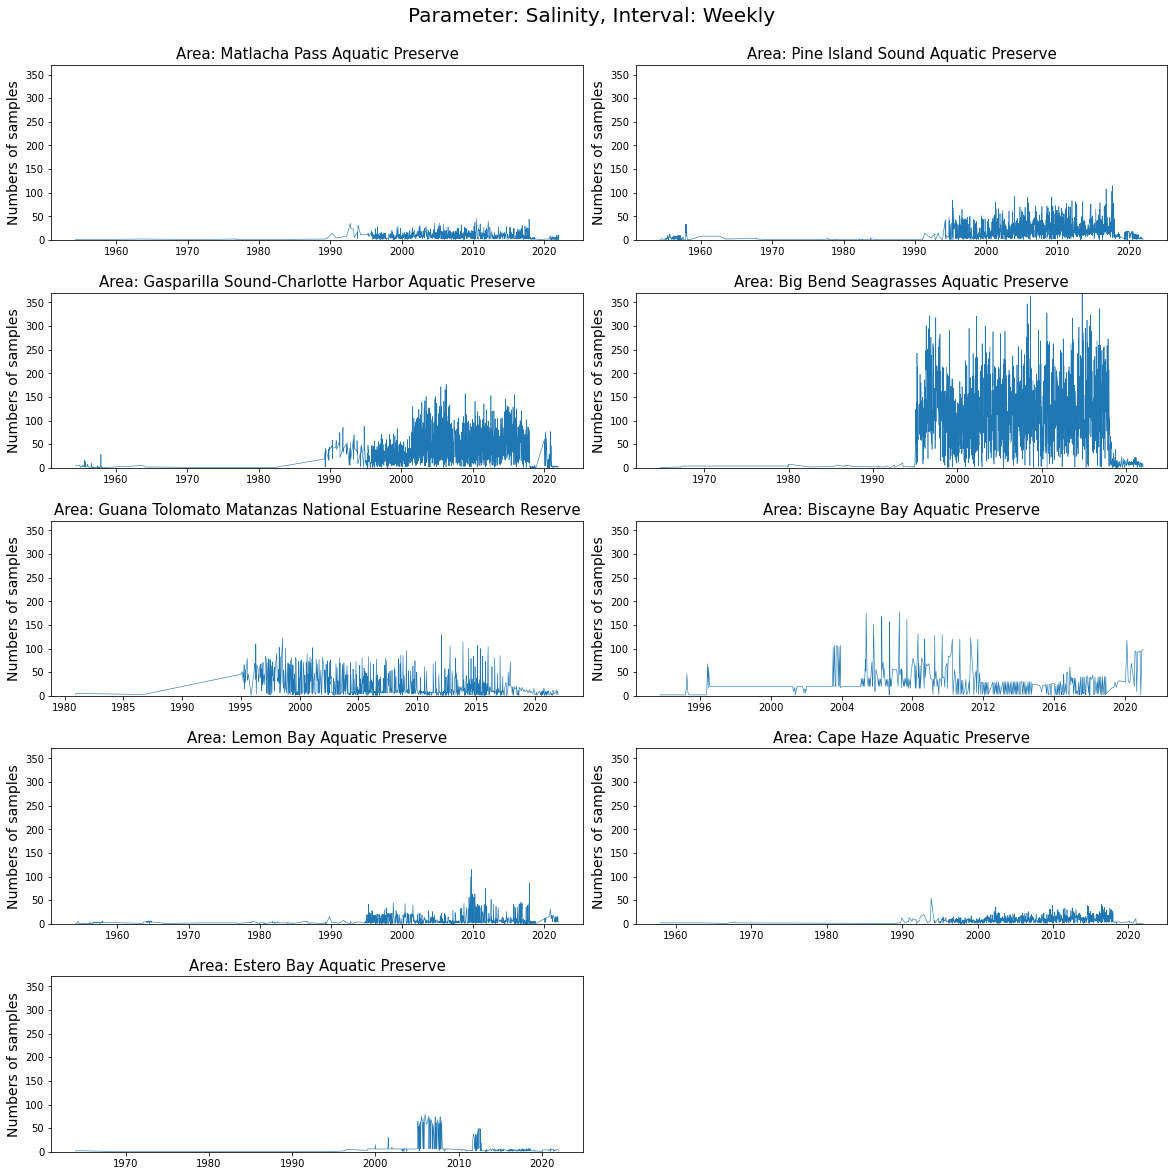

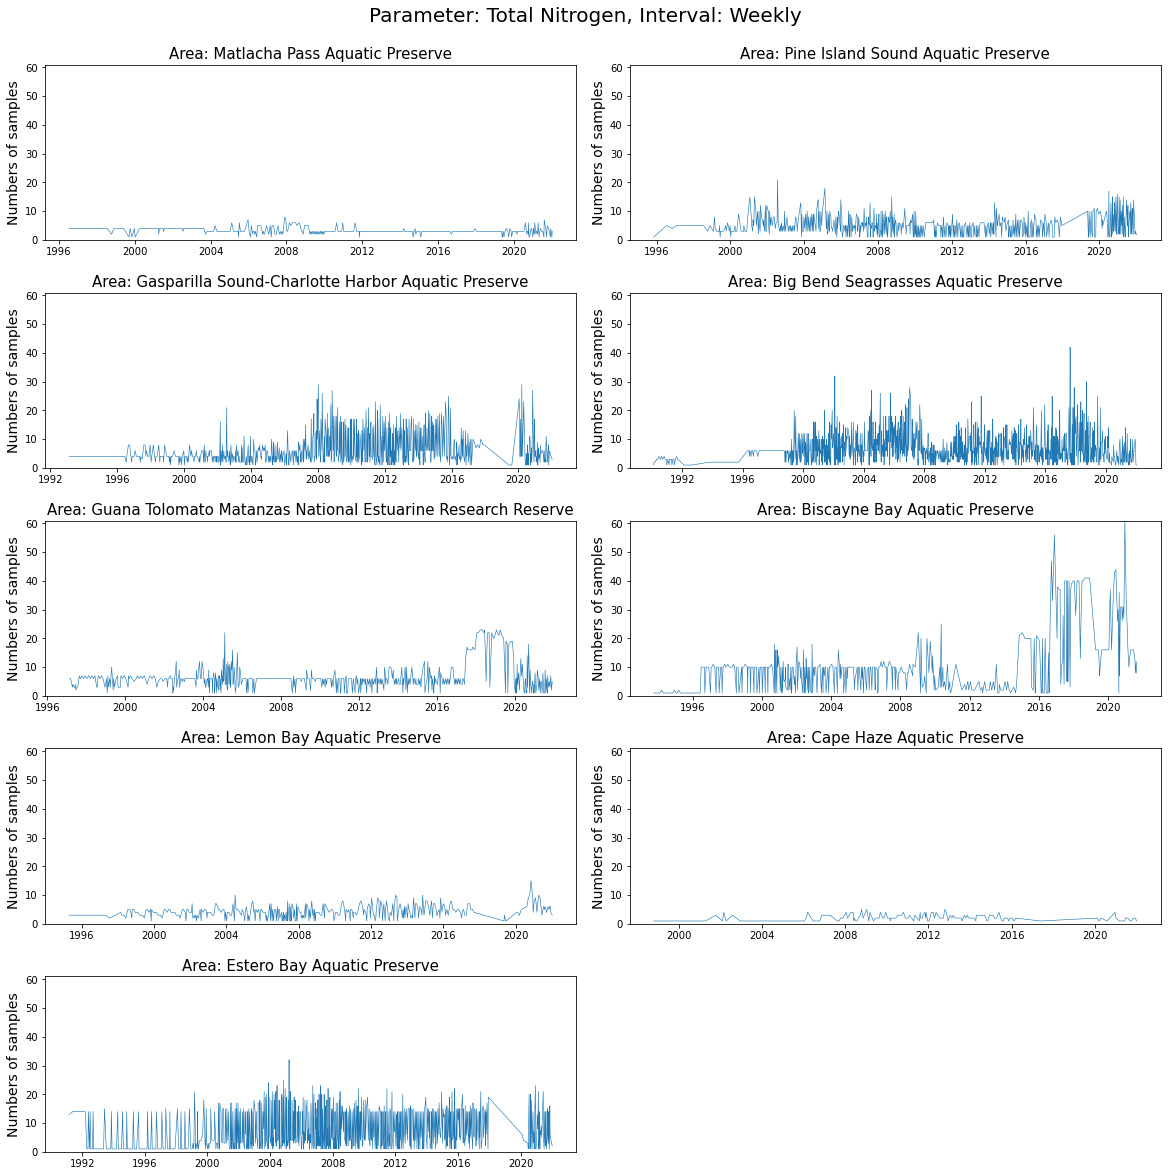

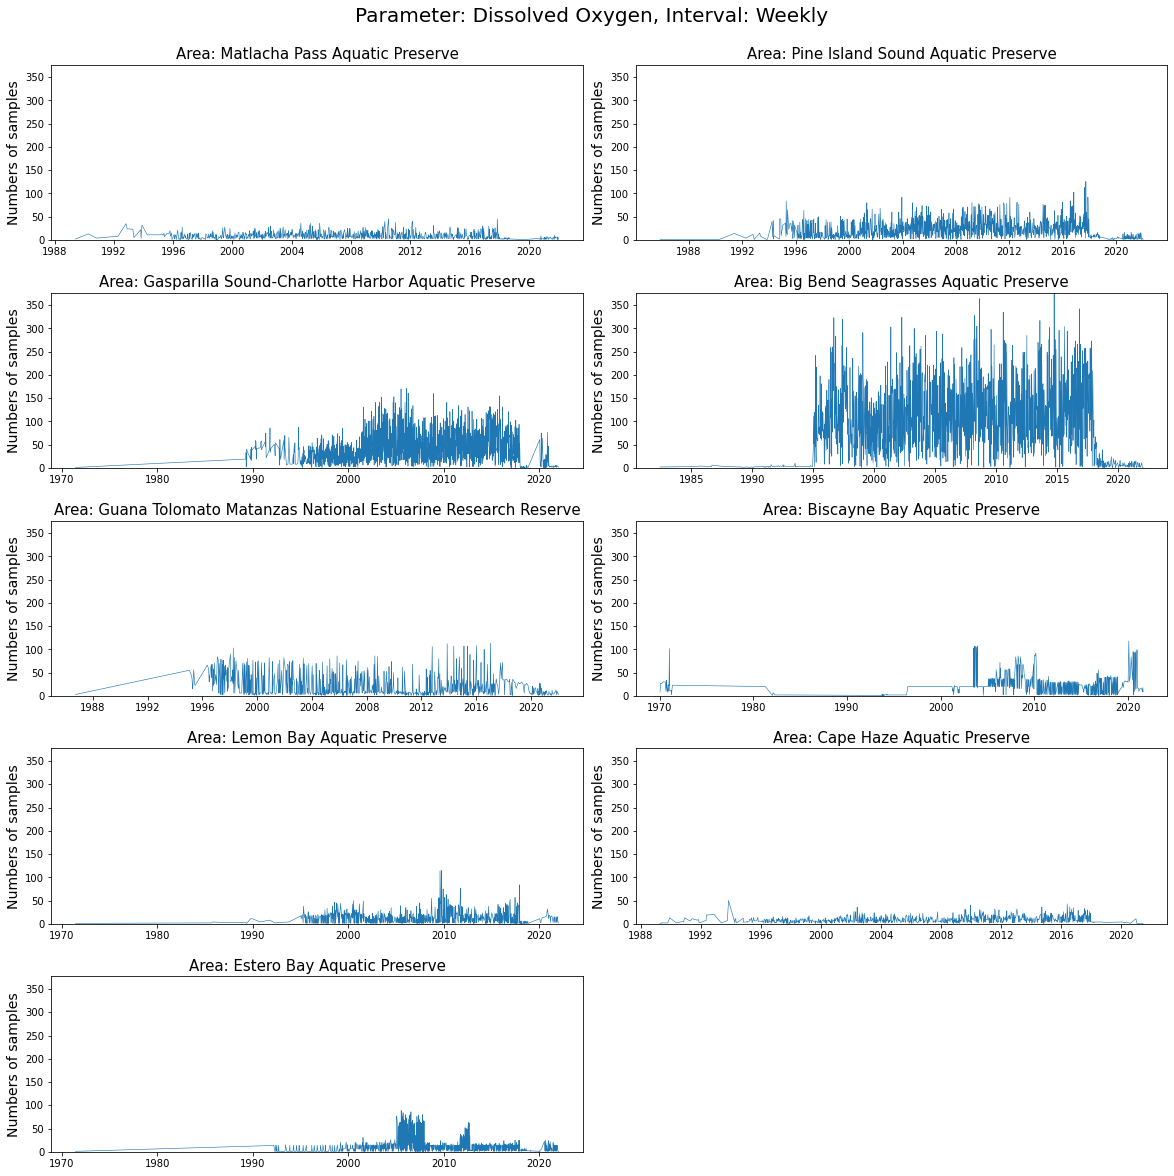

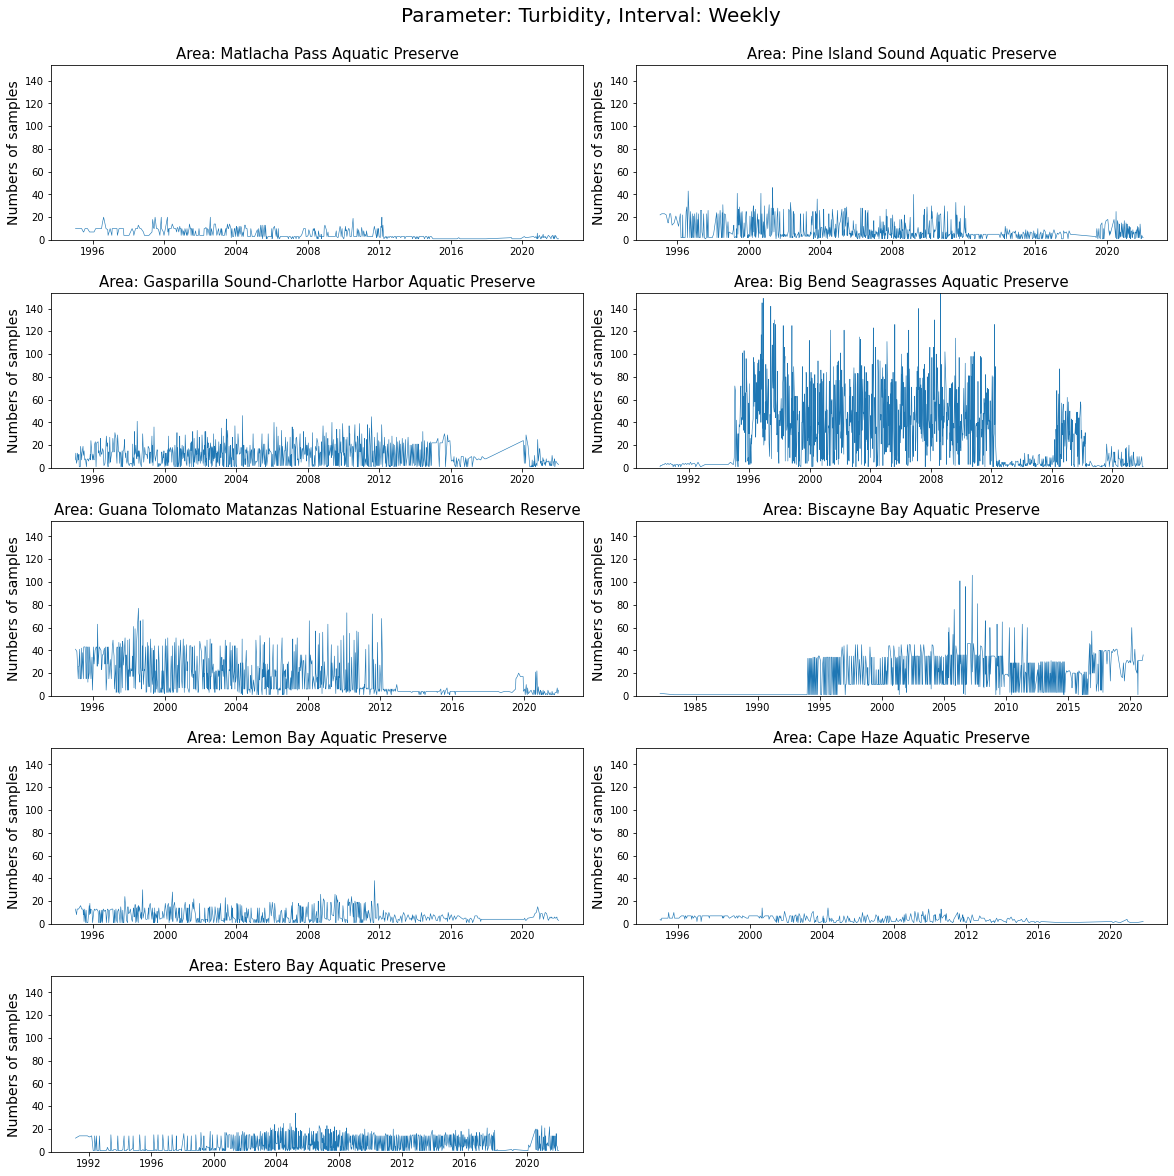

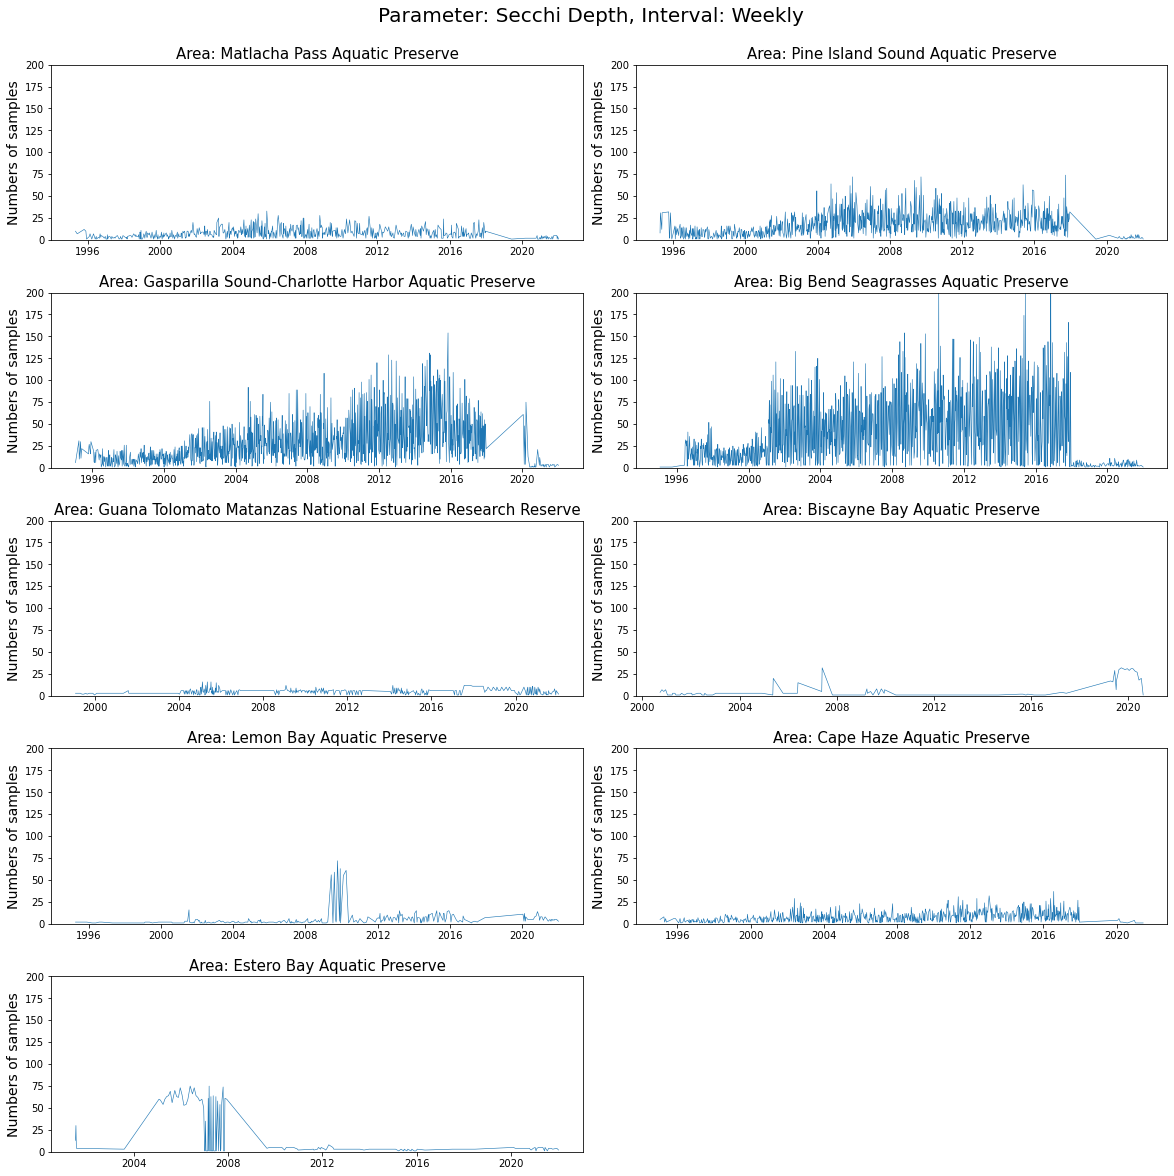

In [5]:
plt.rcParams['figure.figsize'] = [20, 20]
#for value in listValue:
value = listValue[0]
r, c = math.ceil(len(listArea)/2),2 # rows and columns of subplots
for para in listPara:
    fig = plt.figure()
    # Create the main title
    plt.suptitle("Parameter: " + para + ", Interval: Weekly", fontsize = 20, y = 0.92)
    # Calculate the upper limit of y axis
    up_lim = weekly_count[(weekly_count["ParameterName"] == para)]['count'].max()
    for i in range(len(listArea)):
        dfNew = weekly_count[(weekly_count["ParameterName"] == para)&(weekly_count["ManagedAreaName"]== listArea[i])]
        ax = fig.add_subplot(r,c,i+1)
        ax.set_title(str('Area: '+ listArea[i]),size=15) # title of subplots
        ax.plot(dfNew["timestamp"],dfNew[str(value)],linewidth=0.6)
        ax.set_ylim([0,up_lim])
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)
        plt.ylabel("Numbers of samples", size = 14) # Y Labels

### 2.2 Monthly Count

Create line charts for sample **counts** in monthly intervals. These line charts shows sampling activity in different time periods.

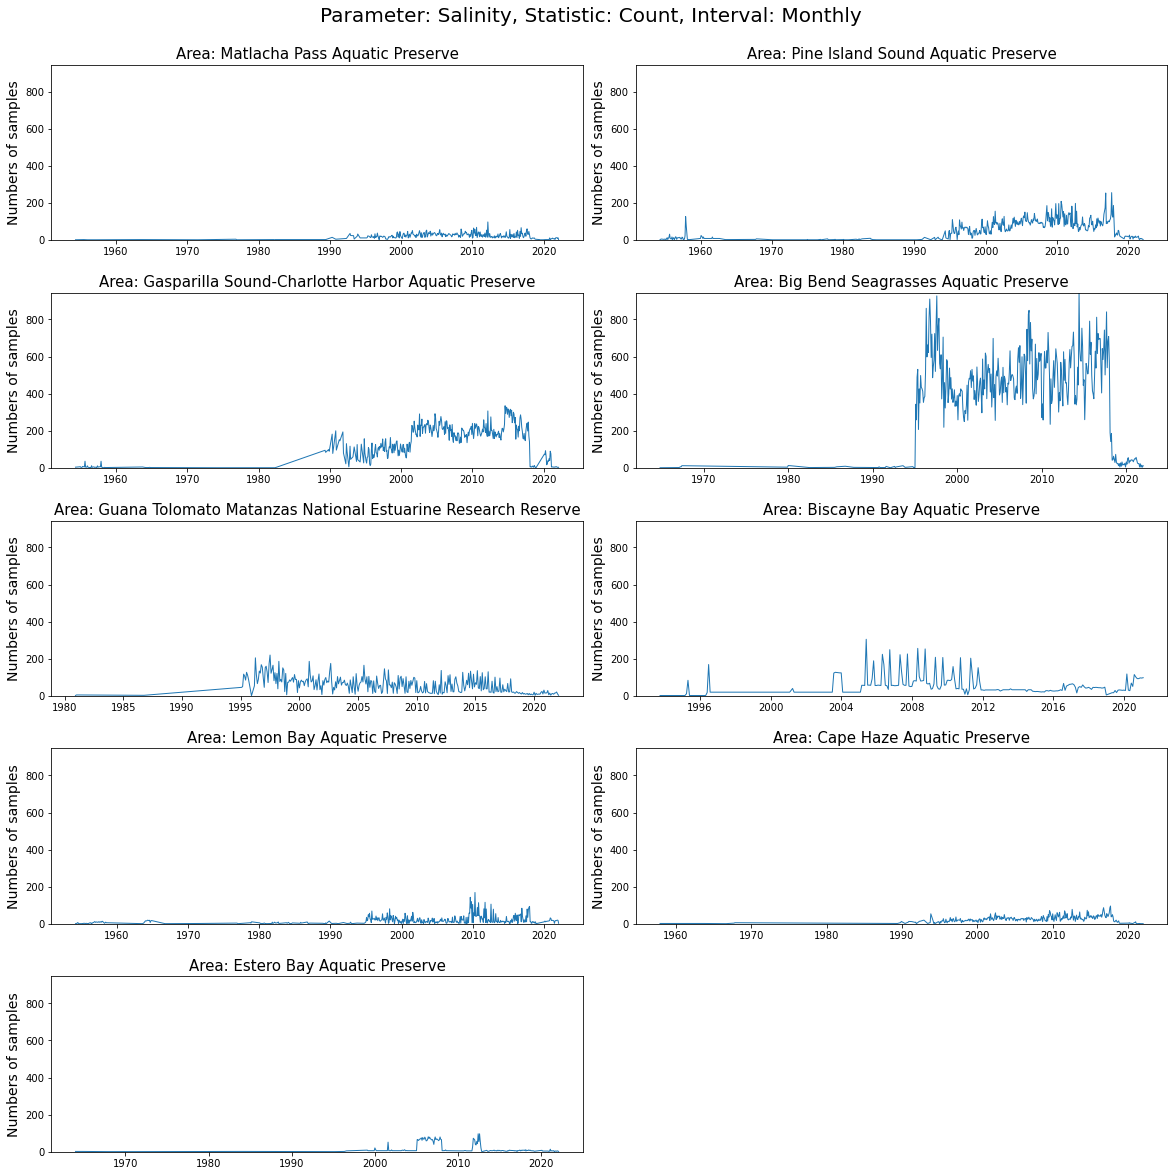

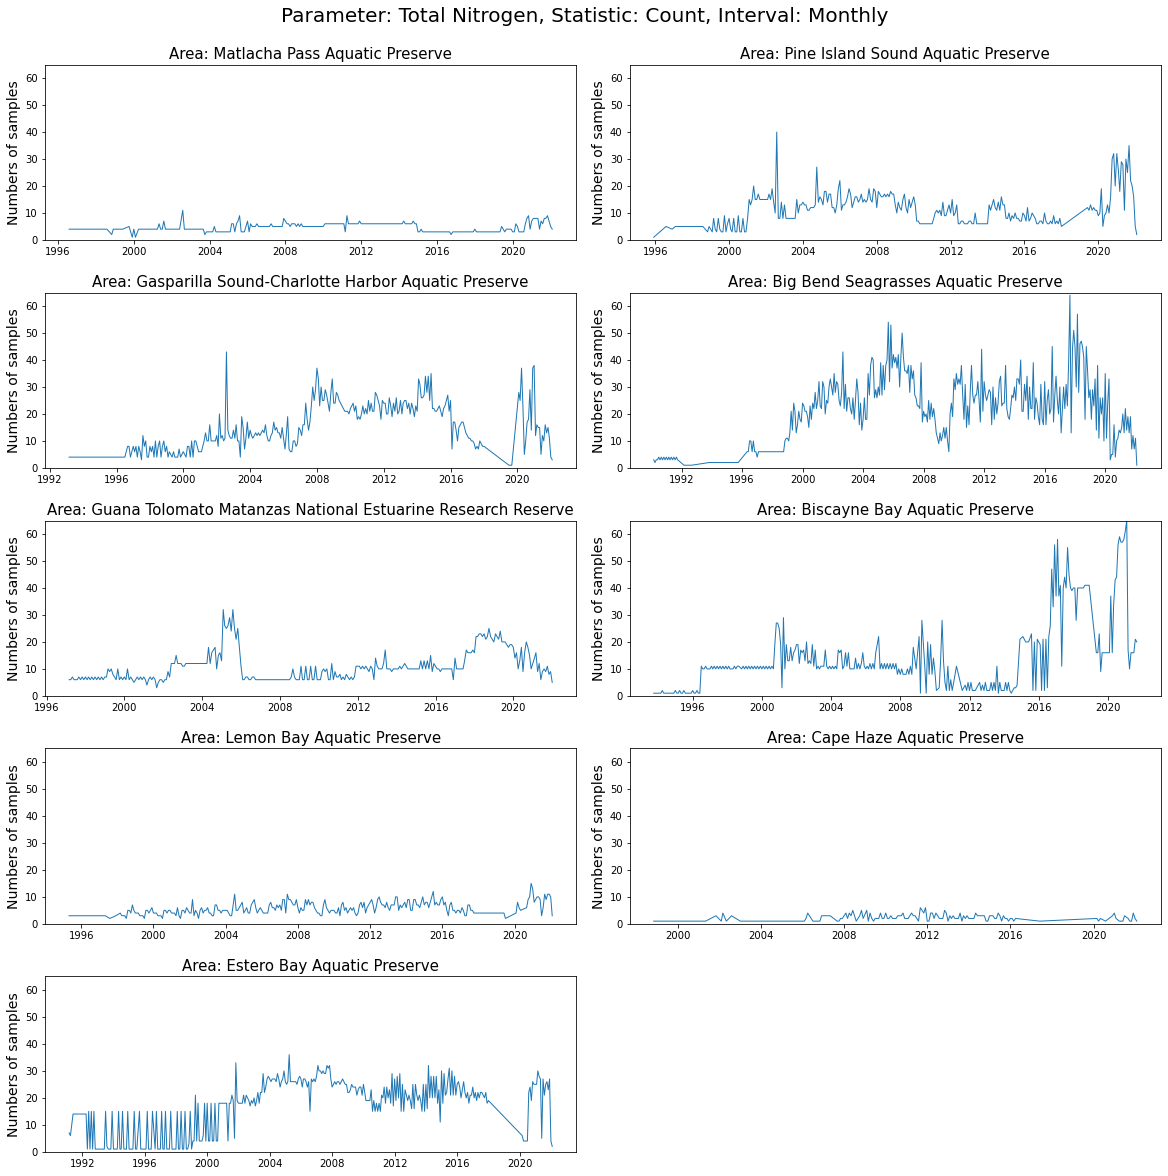

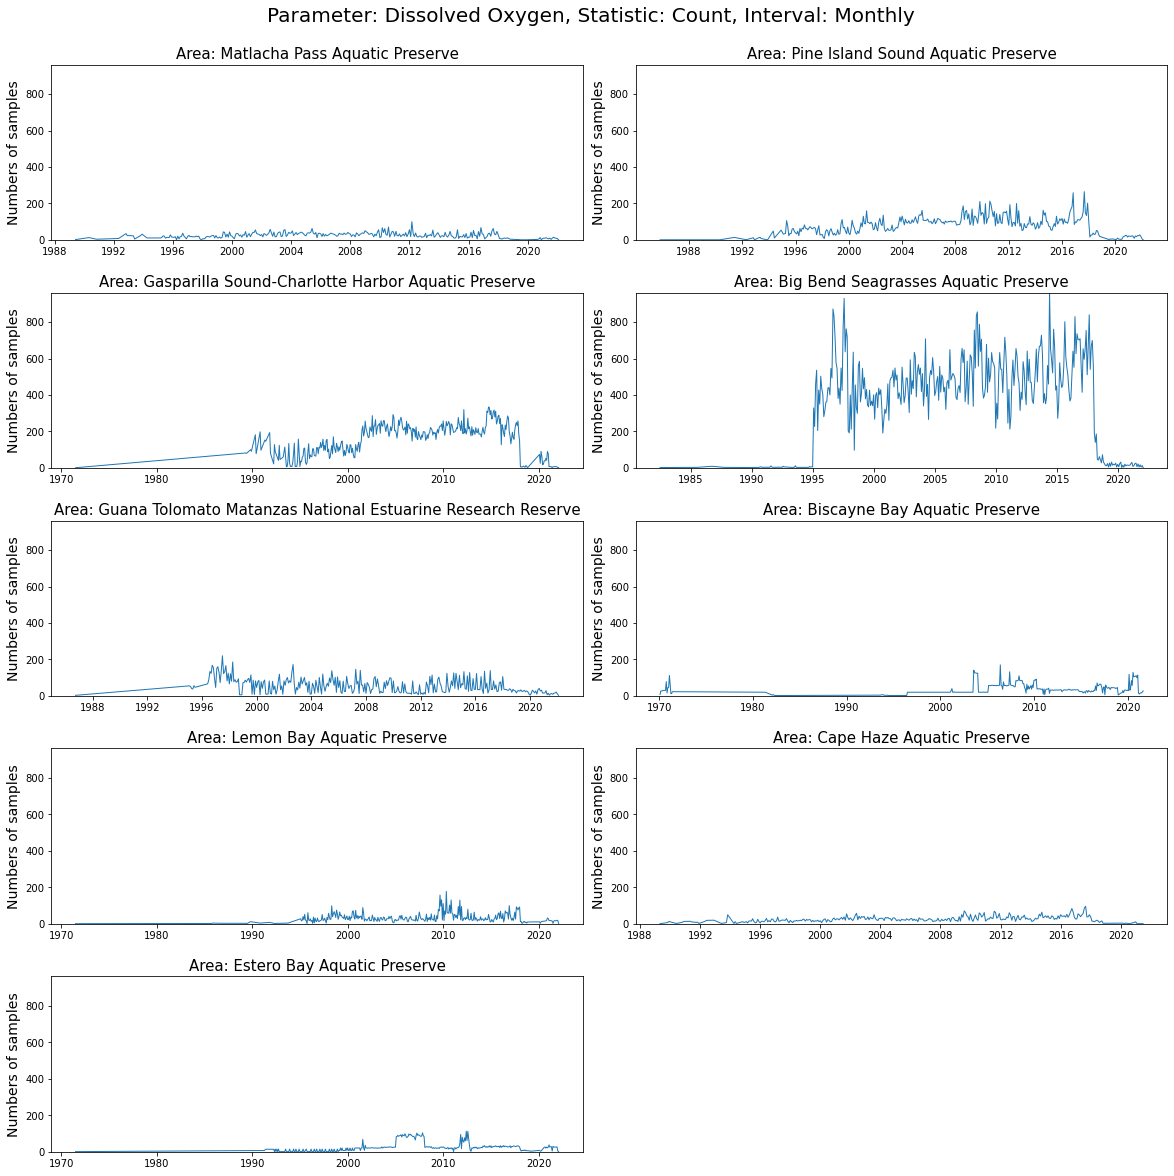

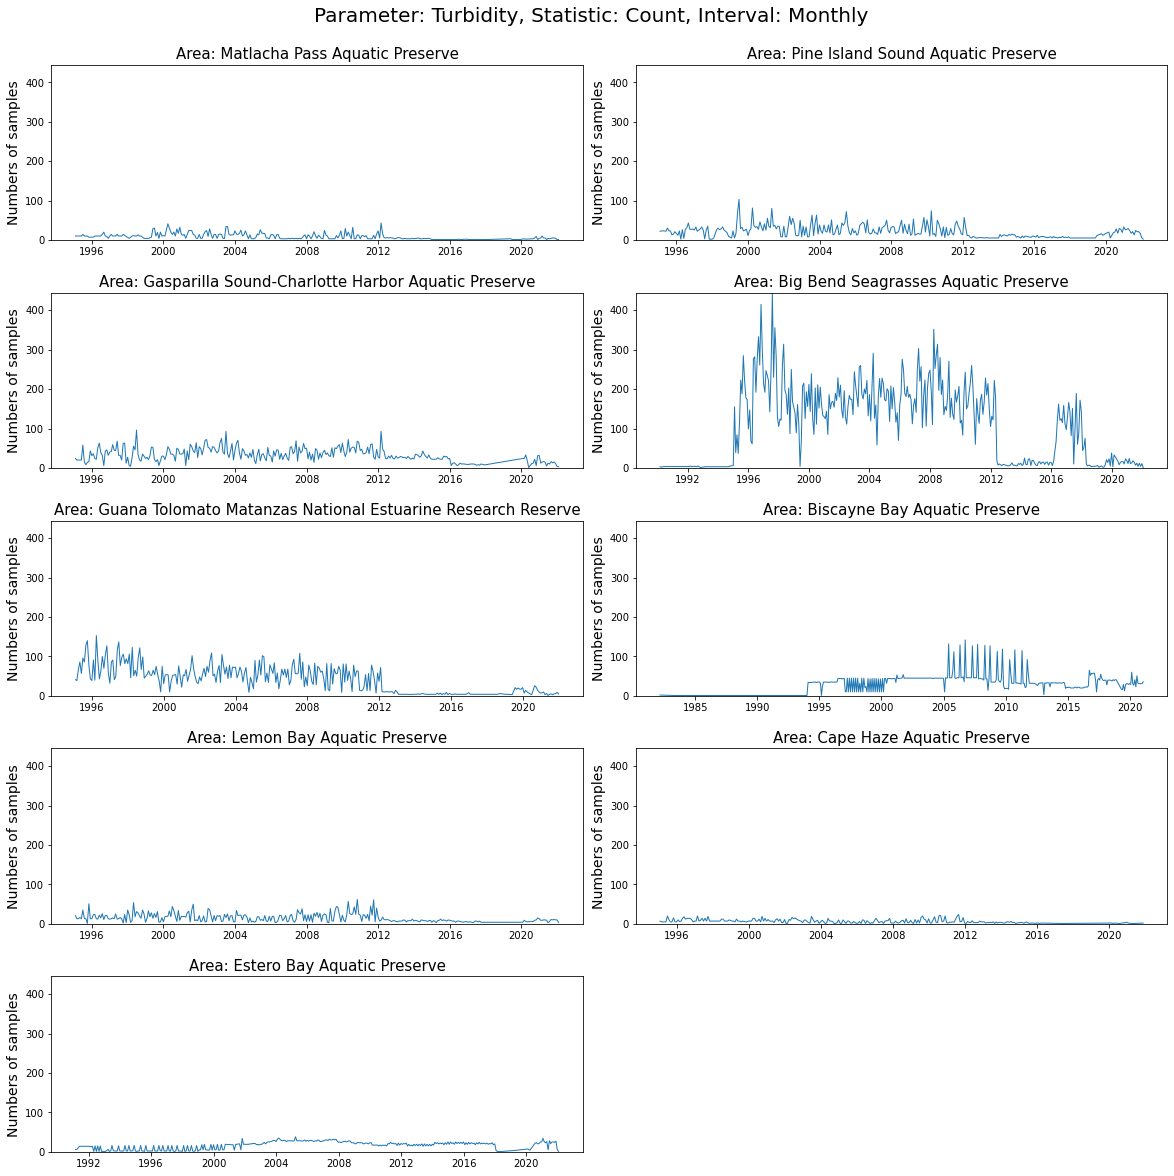

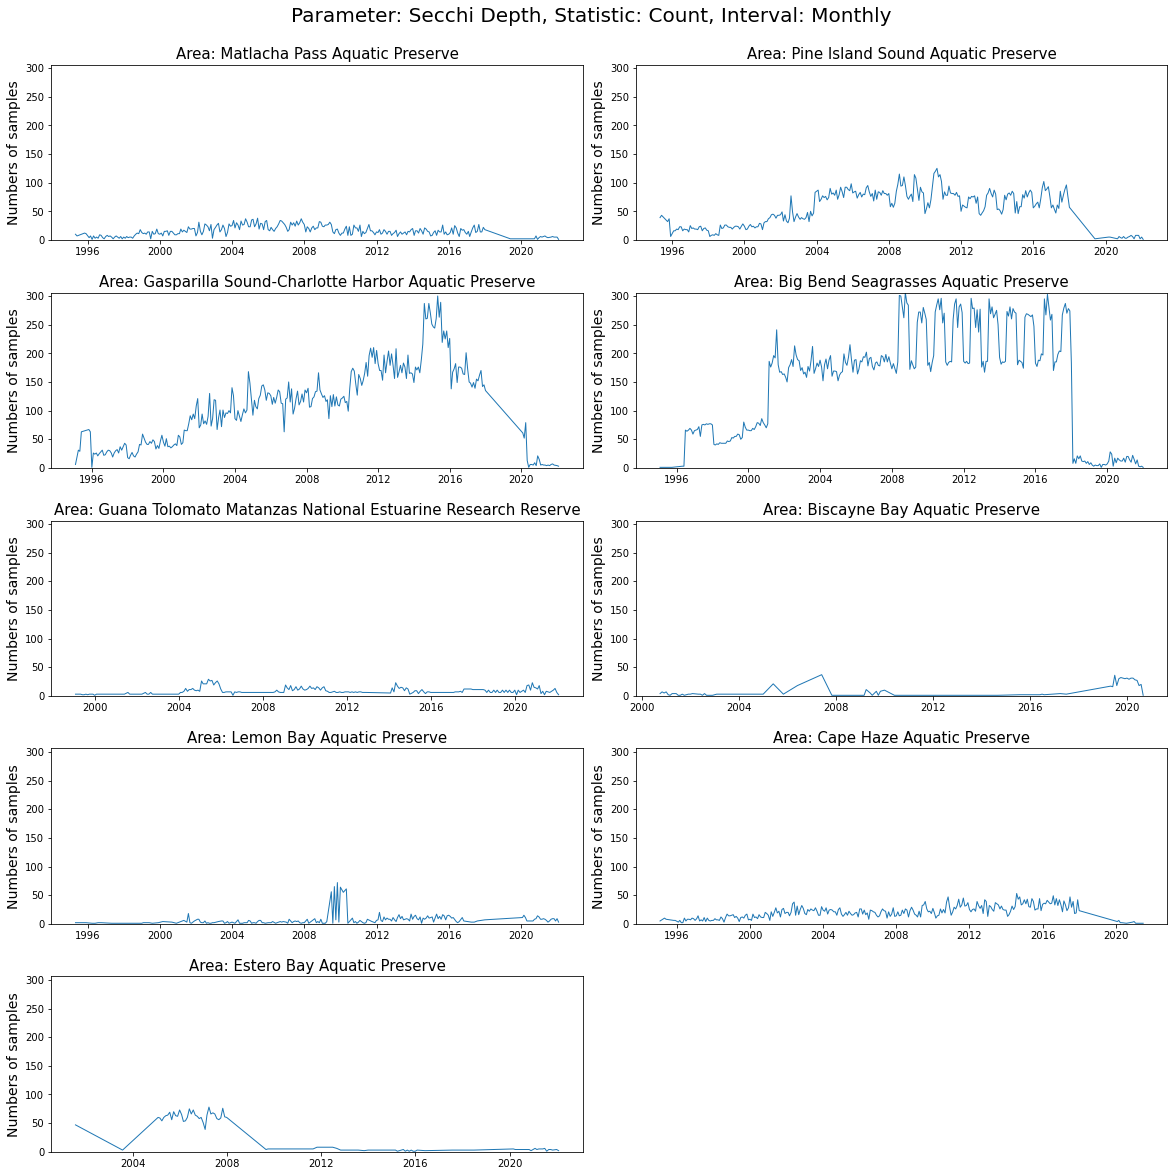

In [6]:
plt.rcParams['figure.figsize'] = [20, 20]
#for value in listValue:
value = listValue[0]
r, c = math.ceil(len(listArea)/2),2
for para in listPara:
    fig = plt.figure()
    # Create the main title
    plt.suptitle("Parameter: " + para + ", Statistic: " + value.capitalize() + ", Interval: Monthly", fontsize = 20, y = 0.92)
    # Calculate the upper limit of y axis
    up_lim = monthly_count[(monthly_count["ParameterName"] == para)]['count'].max()
    for i in range(len(listArea)):
        dfNew = monthly_count[(monthly_count["ParameterName"] == para)&(monthly_count["ManagedAreaName"]== listArea[i])]
        ax = fig.add_subplot(r,c,i+1)
        ax.set_title(str('Area: '+ listArea[i]),size=15) # title of subplots
        ax.plot(dfNew["timestamp"],dfNew[str(value)],linewidth=1)
        ax.set_ylim([0,up_lim])
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)
        plt.ylabel("Numbers of samples", size =14)

### 2.3 Monthly Error Bar

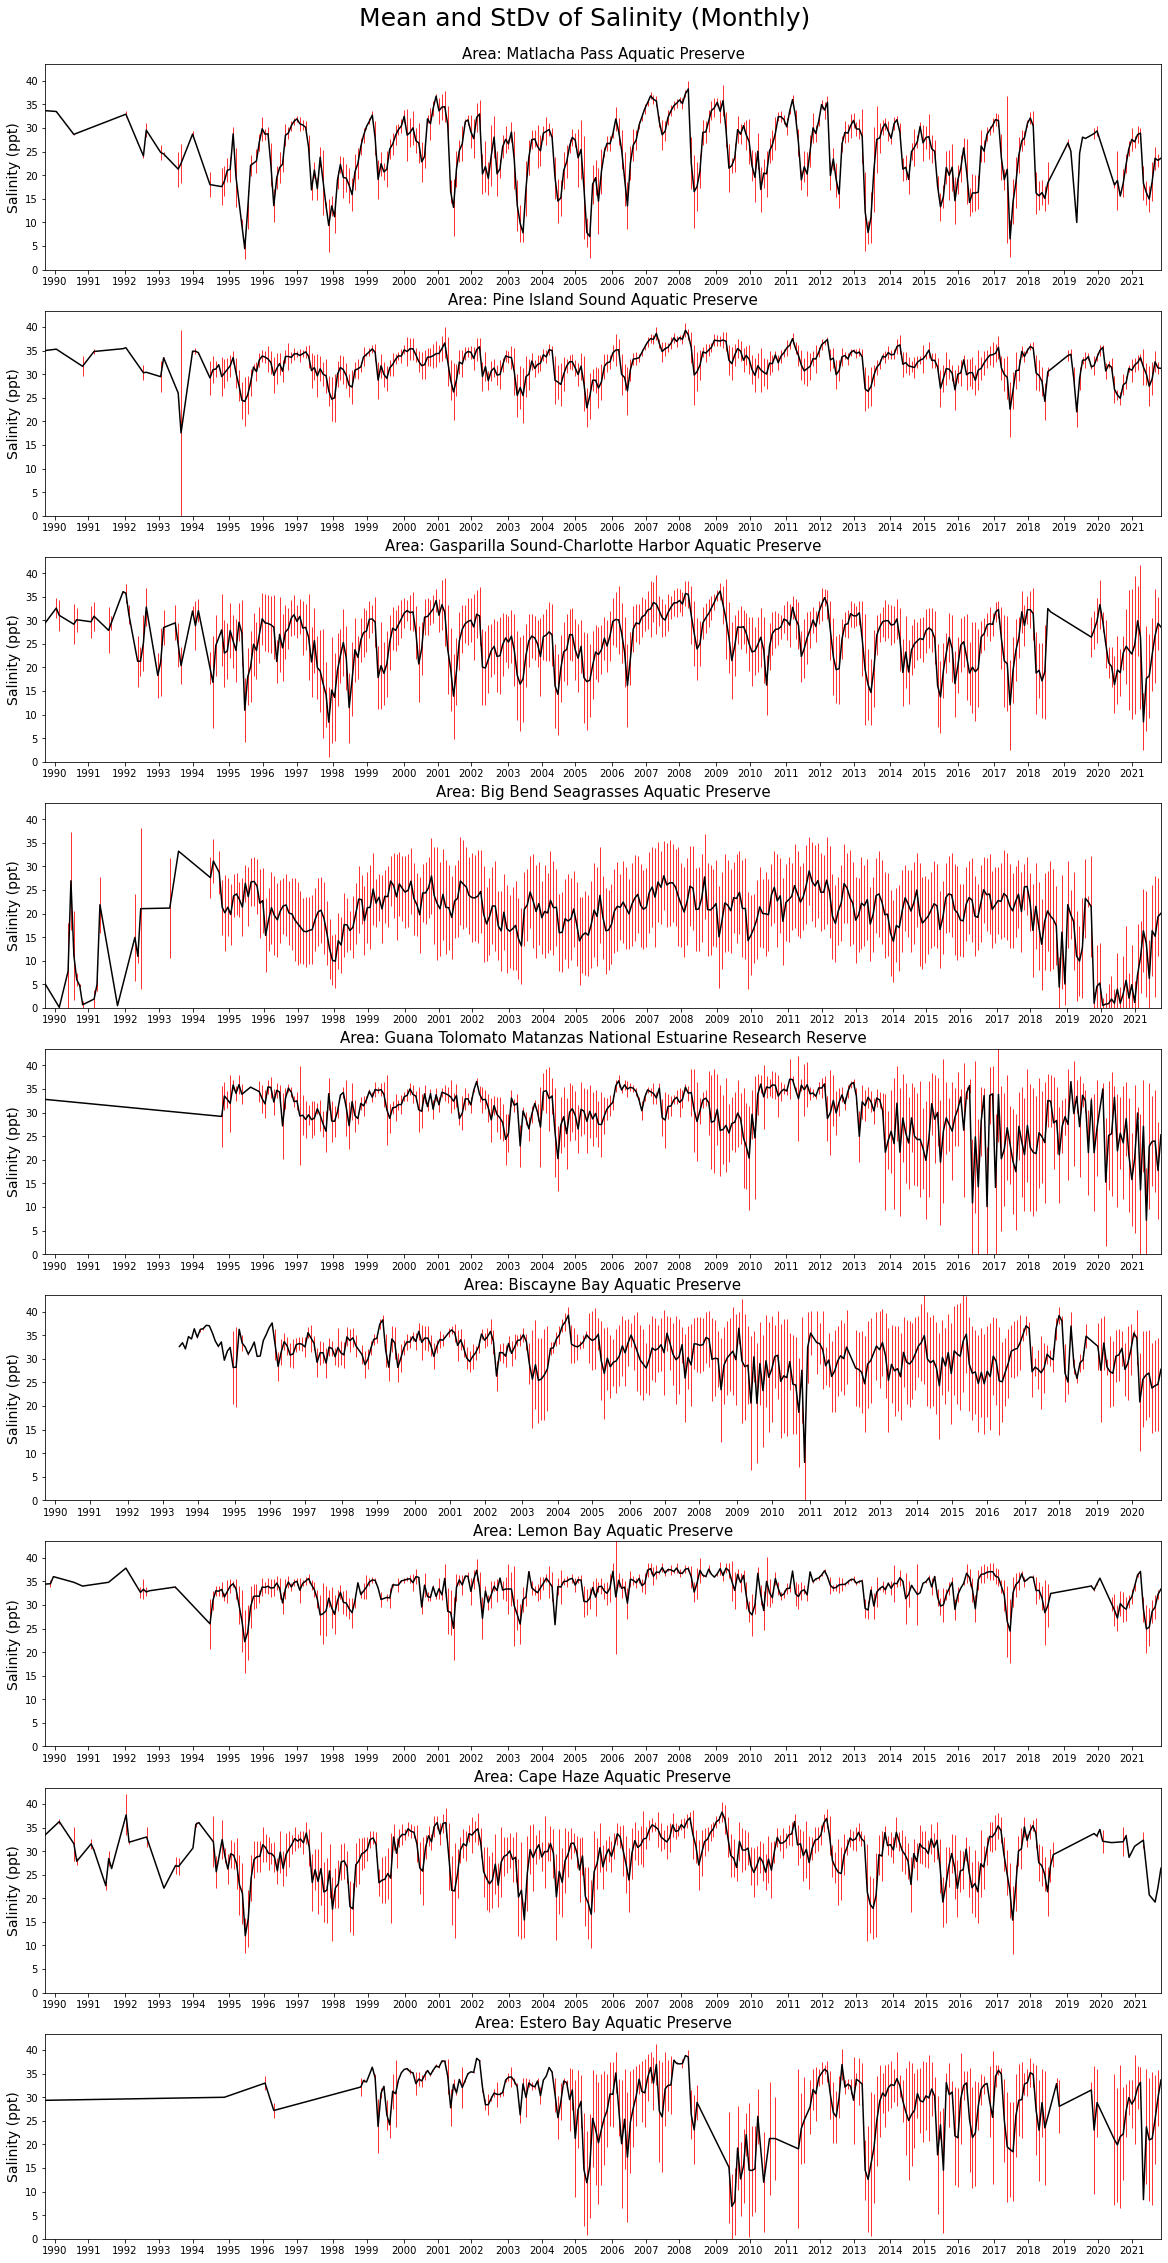

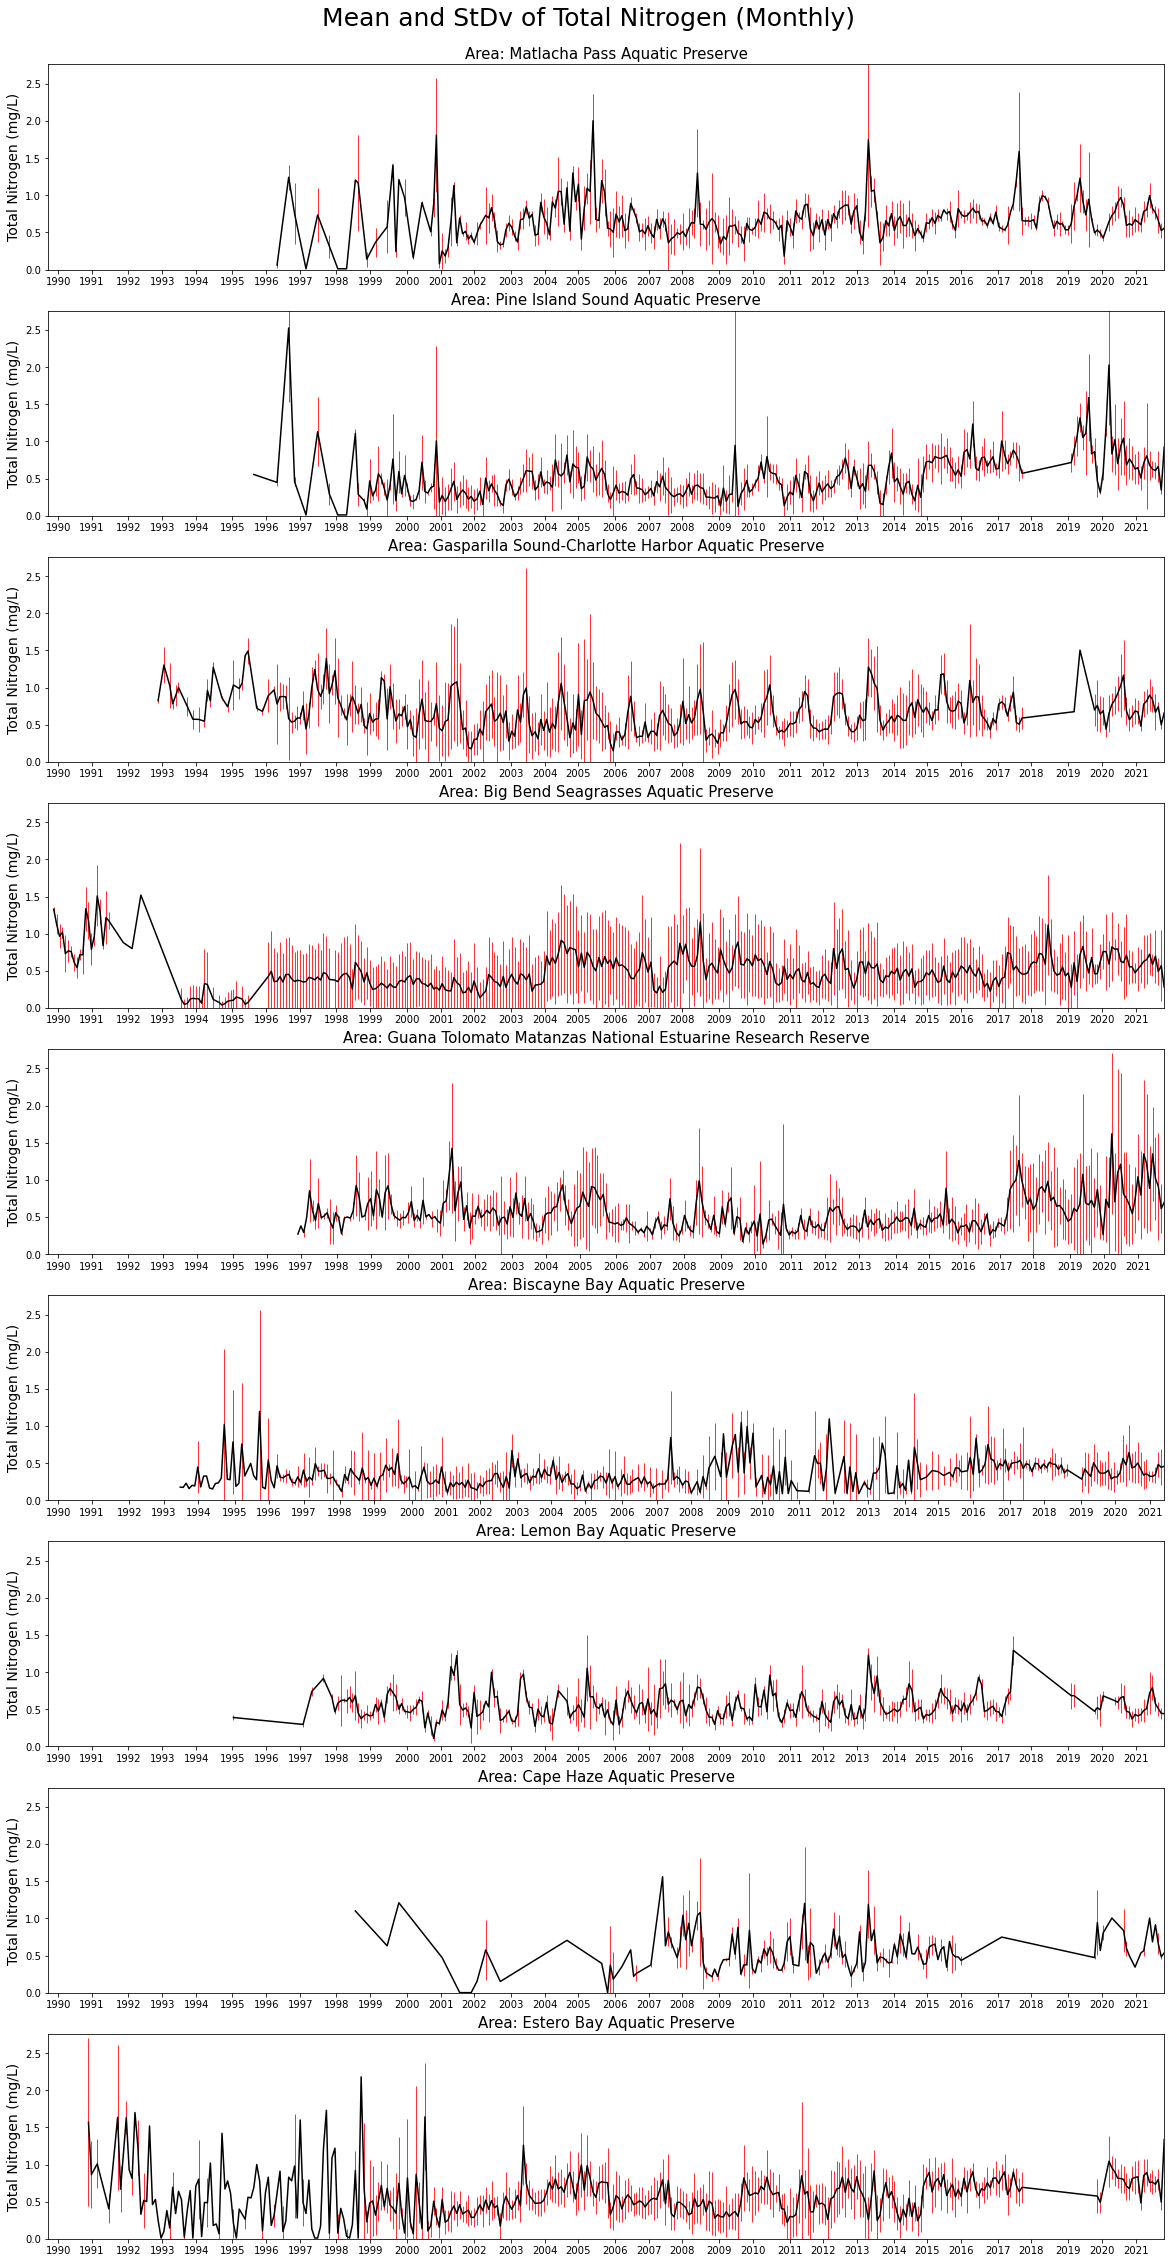

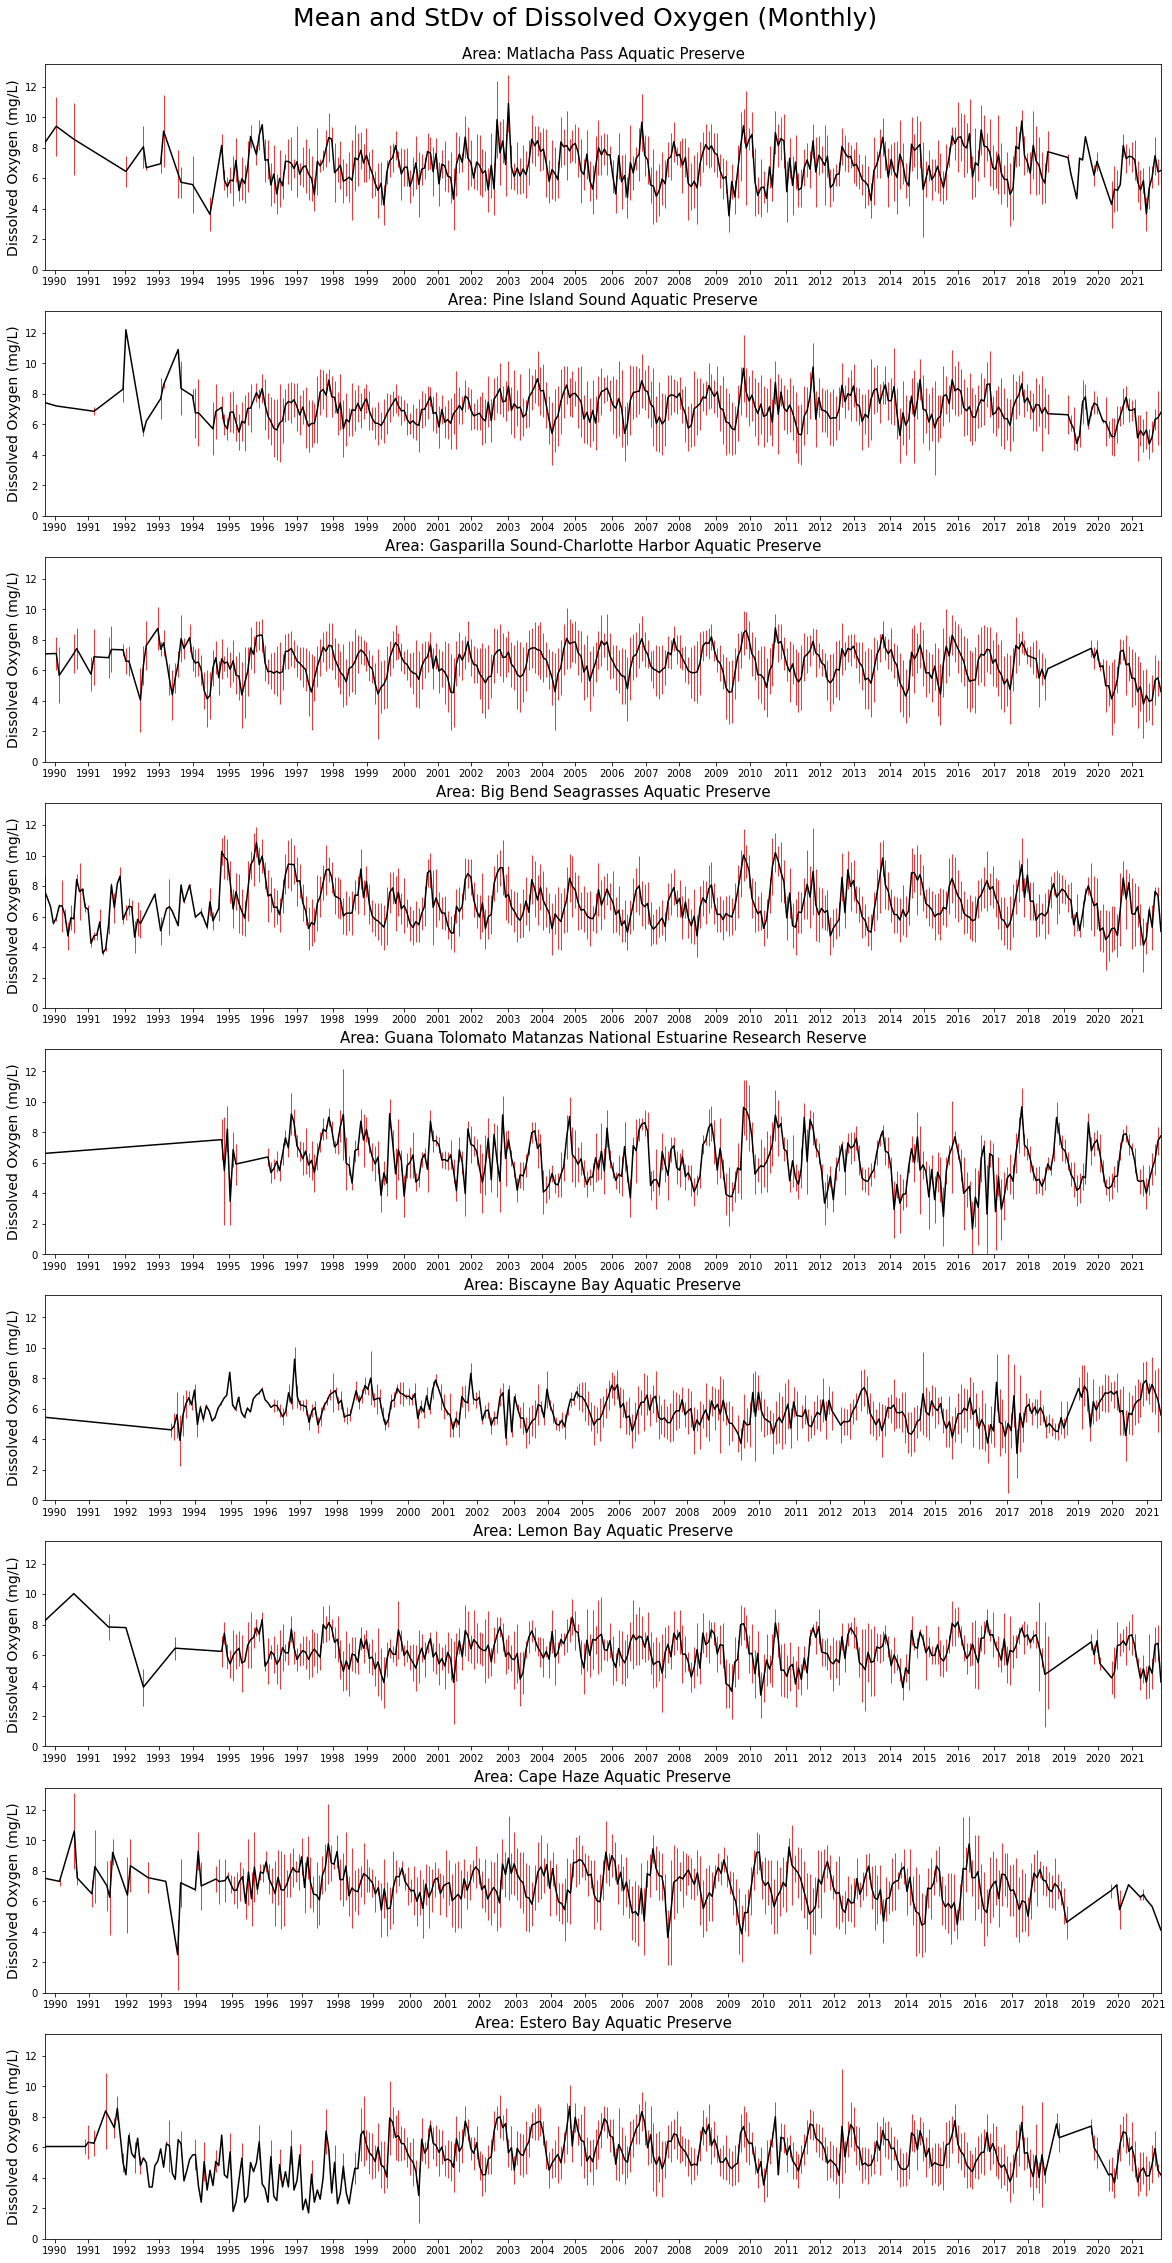

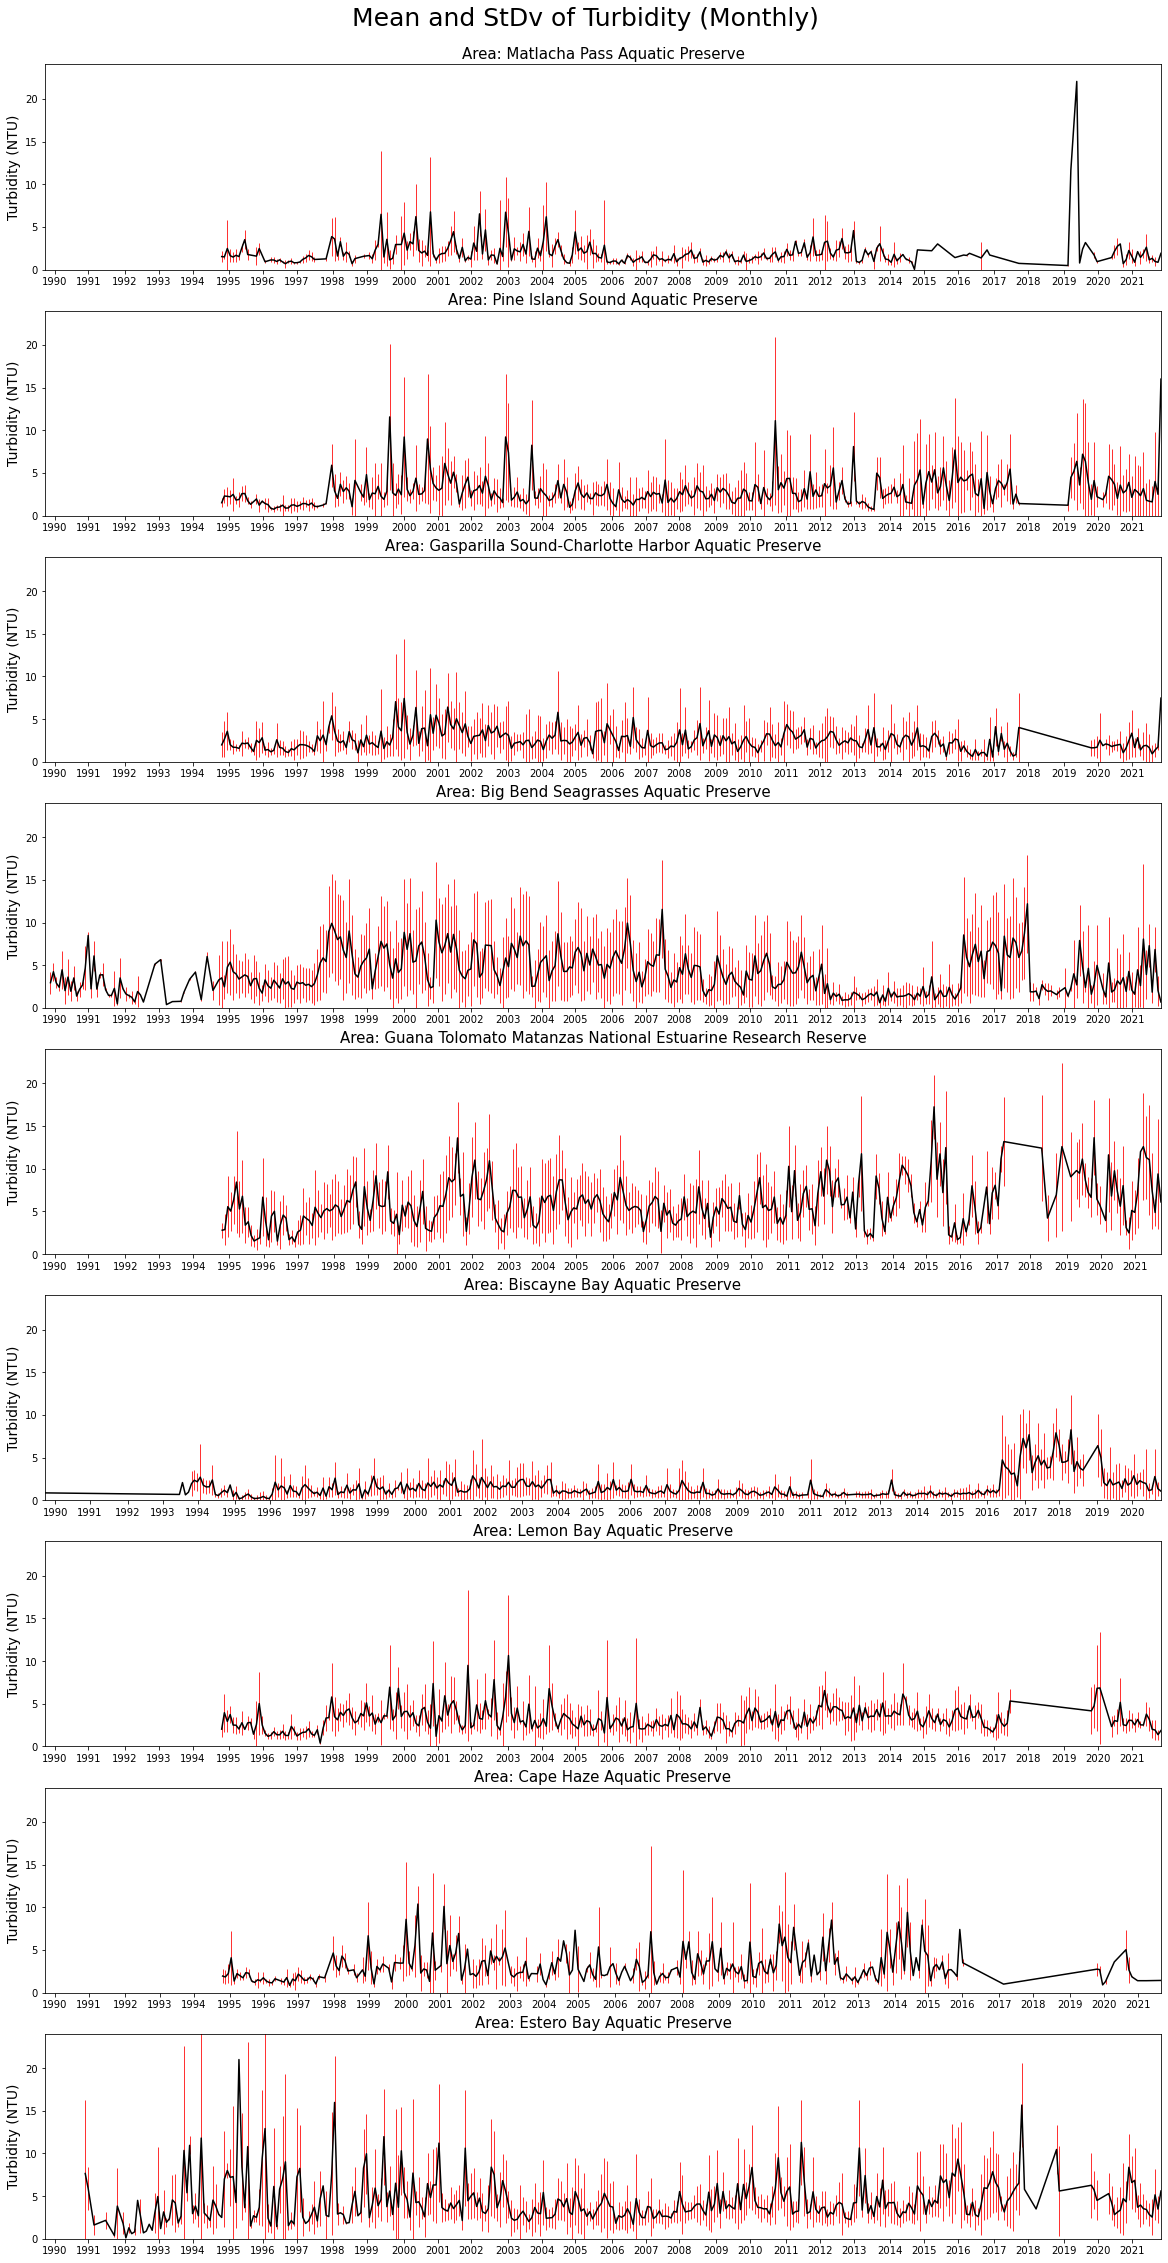

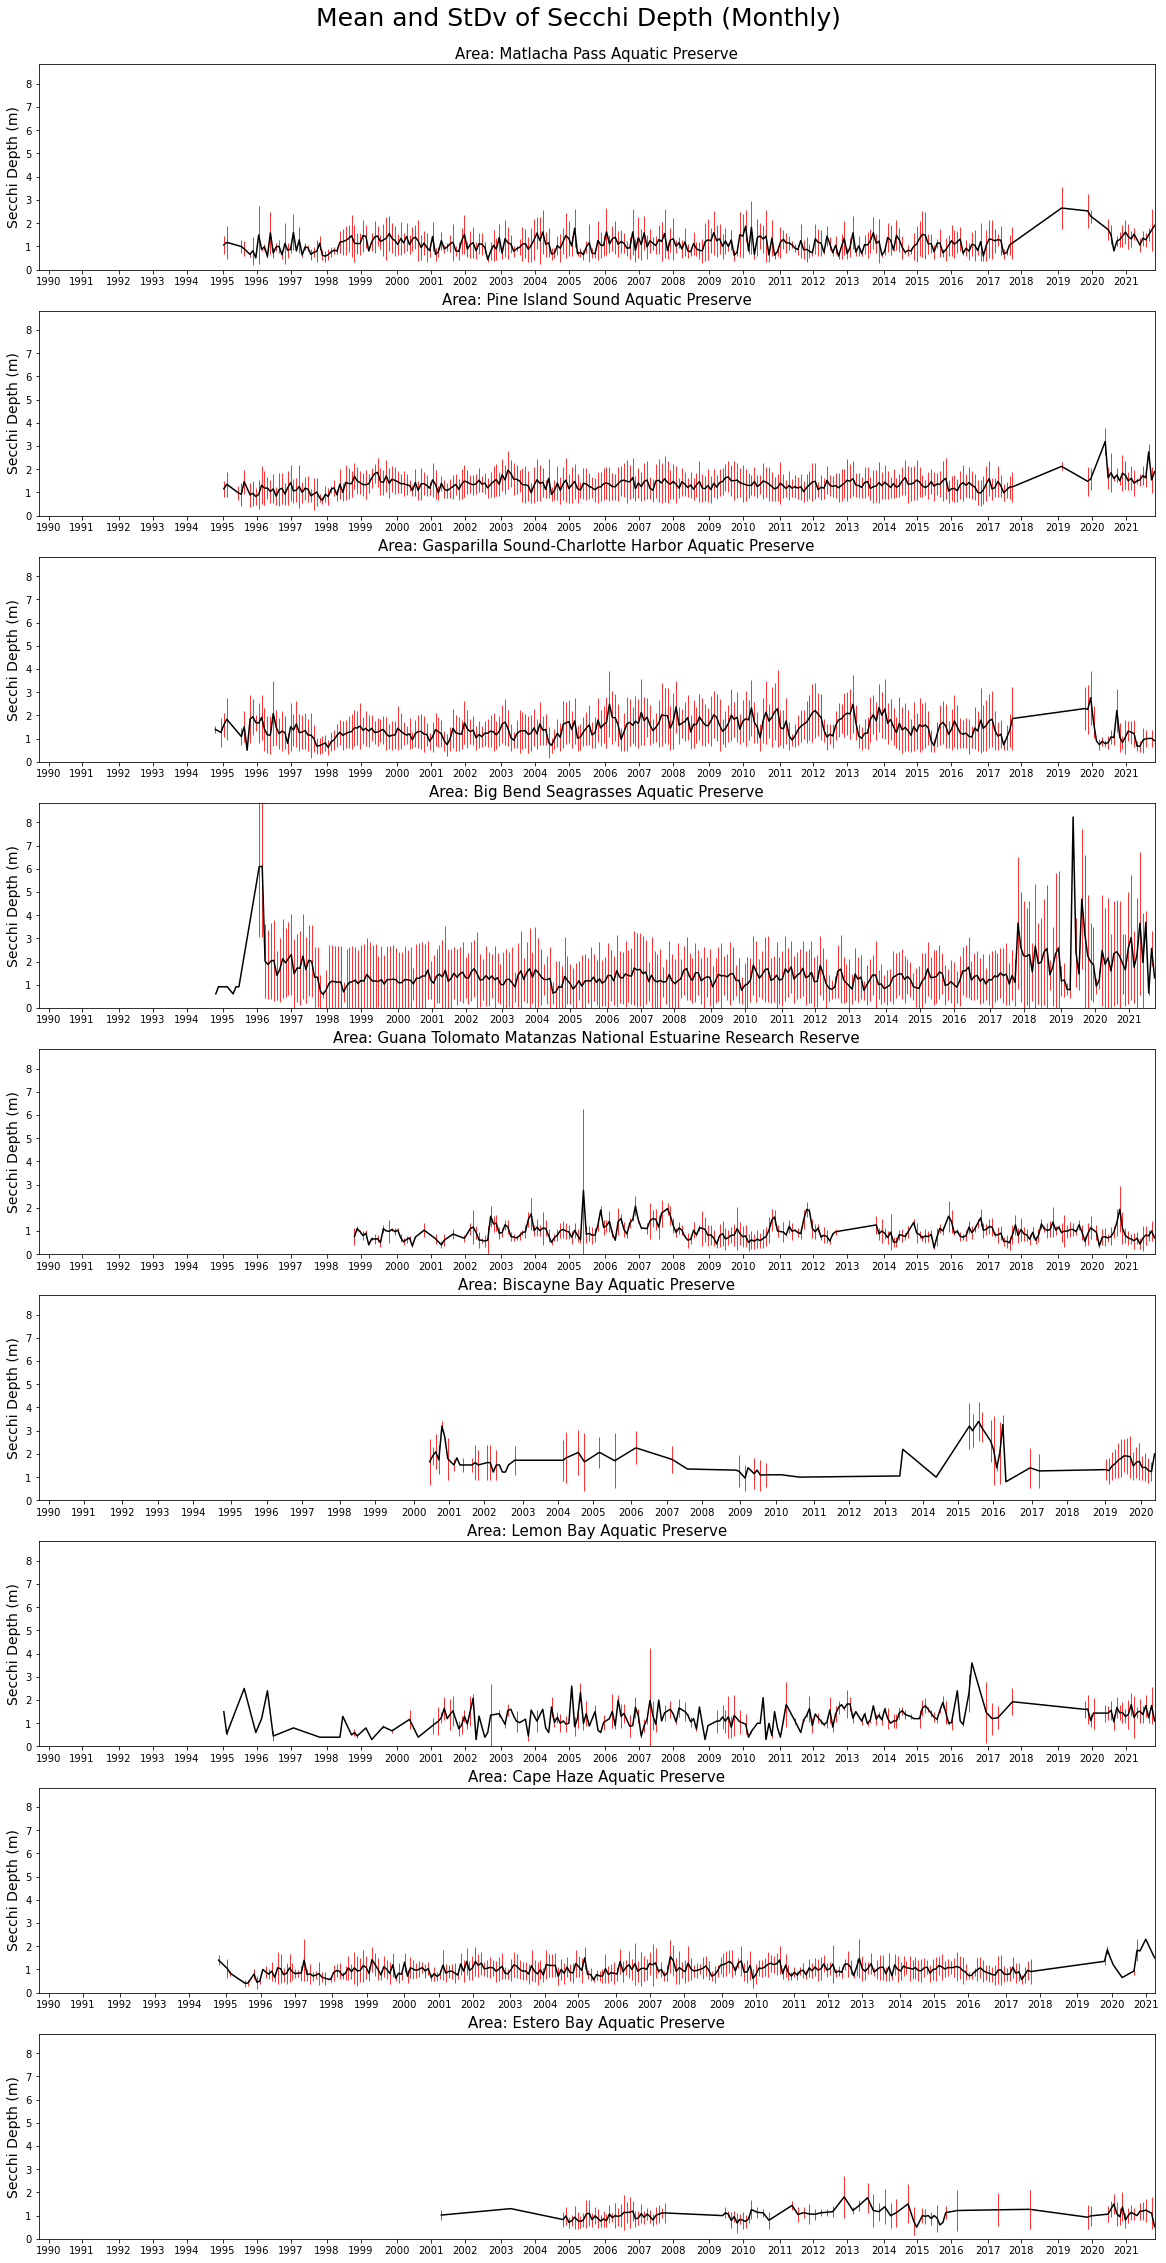

In [7]:
plt.rcParams['figure.figsize'] = [20, 40]
#for value in listValue:
value = listValue[1]

rule  = rrulewrapper(YEARLY, byeaster=1, interval=1)
loc   = RRuleLocator(rule)

r, c = len(listArea),1
for para in listPara:
    fig = plt.figure()
    # Create the main title
    plt.suptitle("Mean and StDv of {} (Monthly)".format(para), fontsize = 25, y = 0.9)
    # Calculate the upper limit of y axis
    stats = monthly_count[(monthly_count["ParameterName"] == para)]
    up_lim = stats['mean'].max()+stats['std'].mean()
    for i in range(len(listArea)):
        dfNew = monthly_count[(monthly_count["ParameterName"] == para)&(monthly_count["ManagedAreaName"]== listArea[i])]
        ax = fig.add_subplot(9,1,i+1)
        
        # Set title and font size
        ax.set_title('Area: '+ str(listArea[i]), size=15) # Title

        ax.errorbar(dfNew["timestamp"],dfNew['mean'],dfNew['std'],ecolor='red',elinewidth = 0.8,color="black")
        ax.xaxis.set_major_locator(loc)
        
        # Set limit of x and y axis
        ax.set_ylim([0,up_lim])
        ax.set_xlim([pd.Timestamp('1990-01-01'),dfNew["timestamp"].max()])
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None)
        plt.ylabel("{} ({})".format(para,dictUnits[para]), size = 14)

### 2.4 Yearly Error Bars

Black line is the mean and red lines are -1/+1 standard deviation.

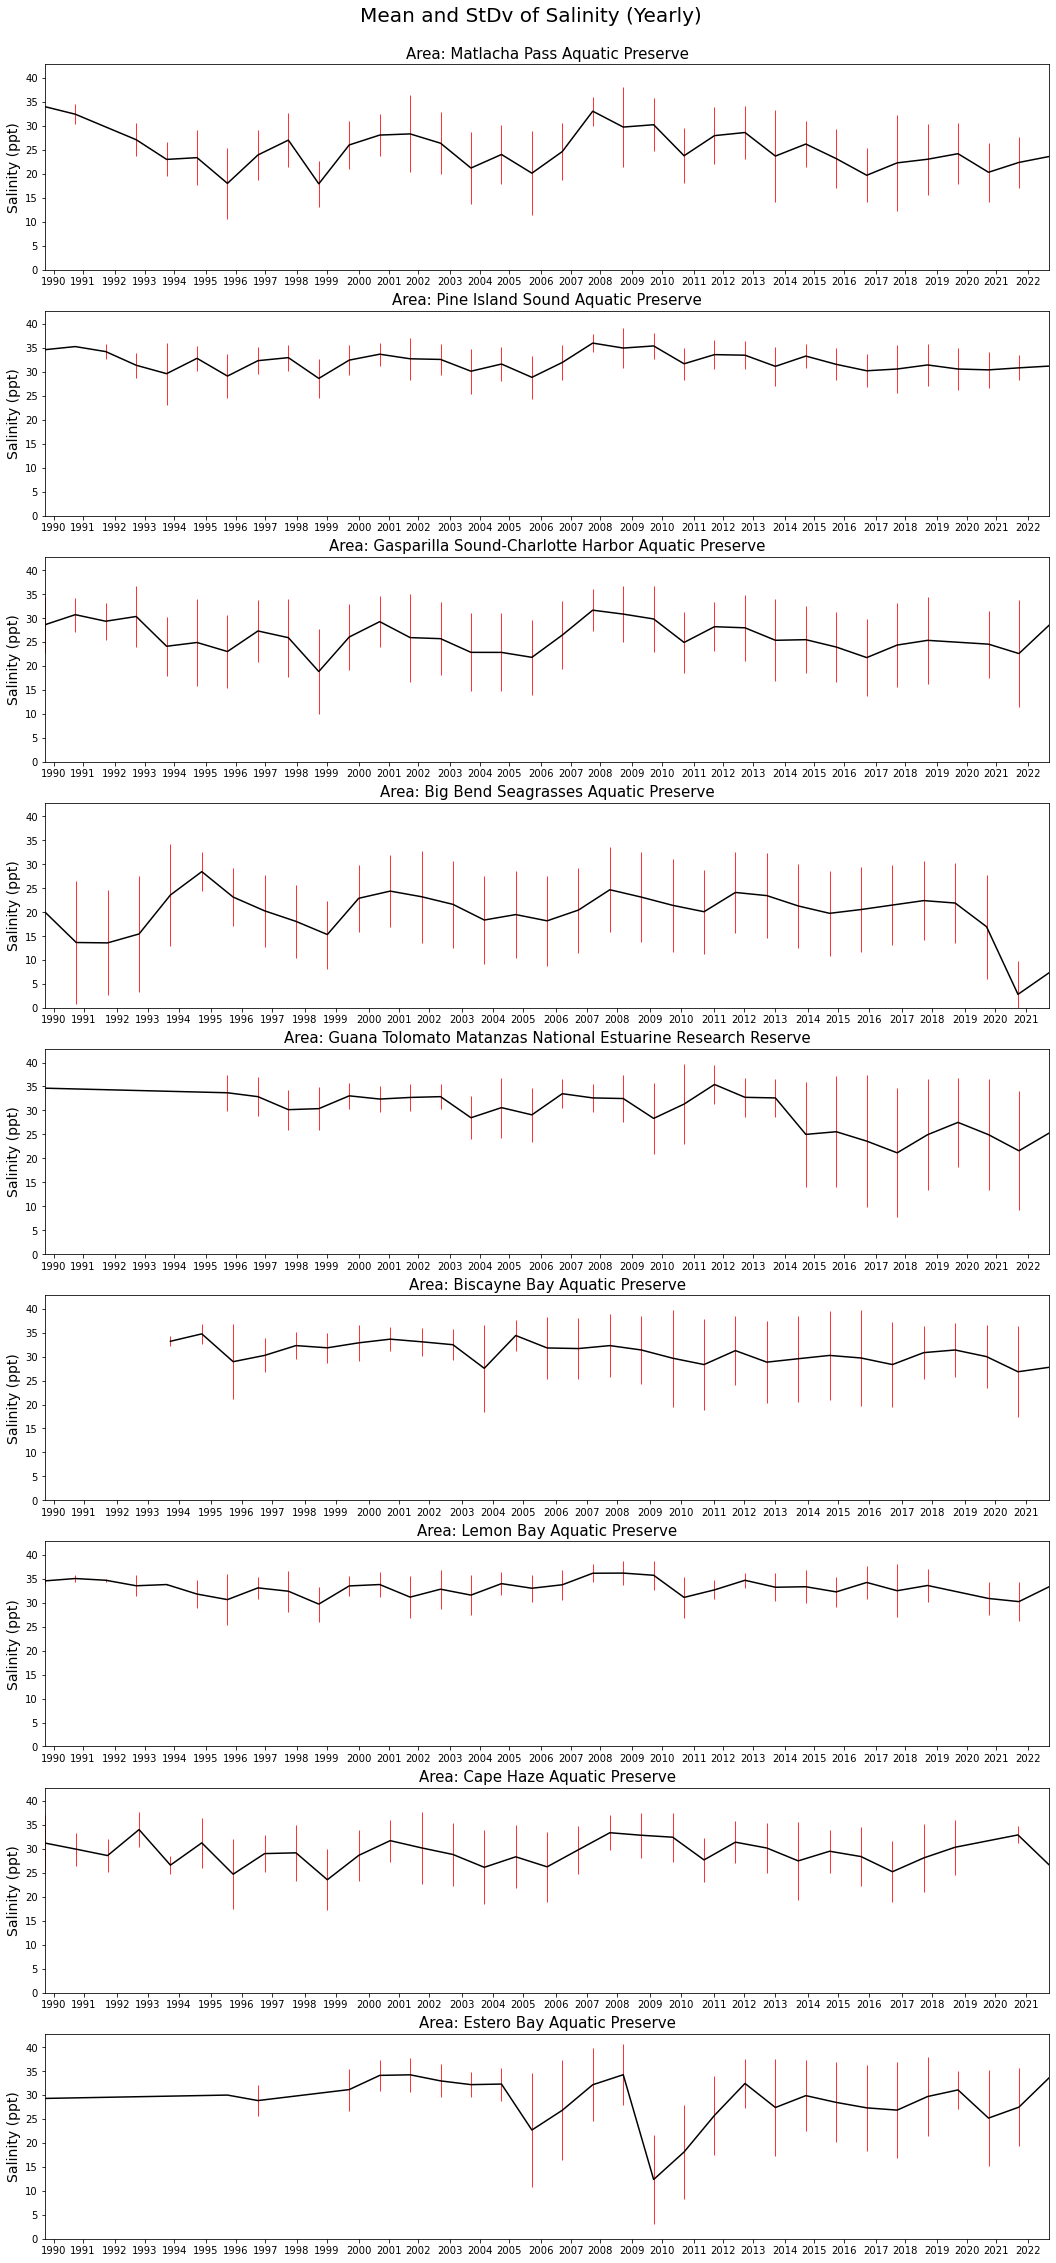

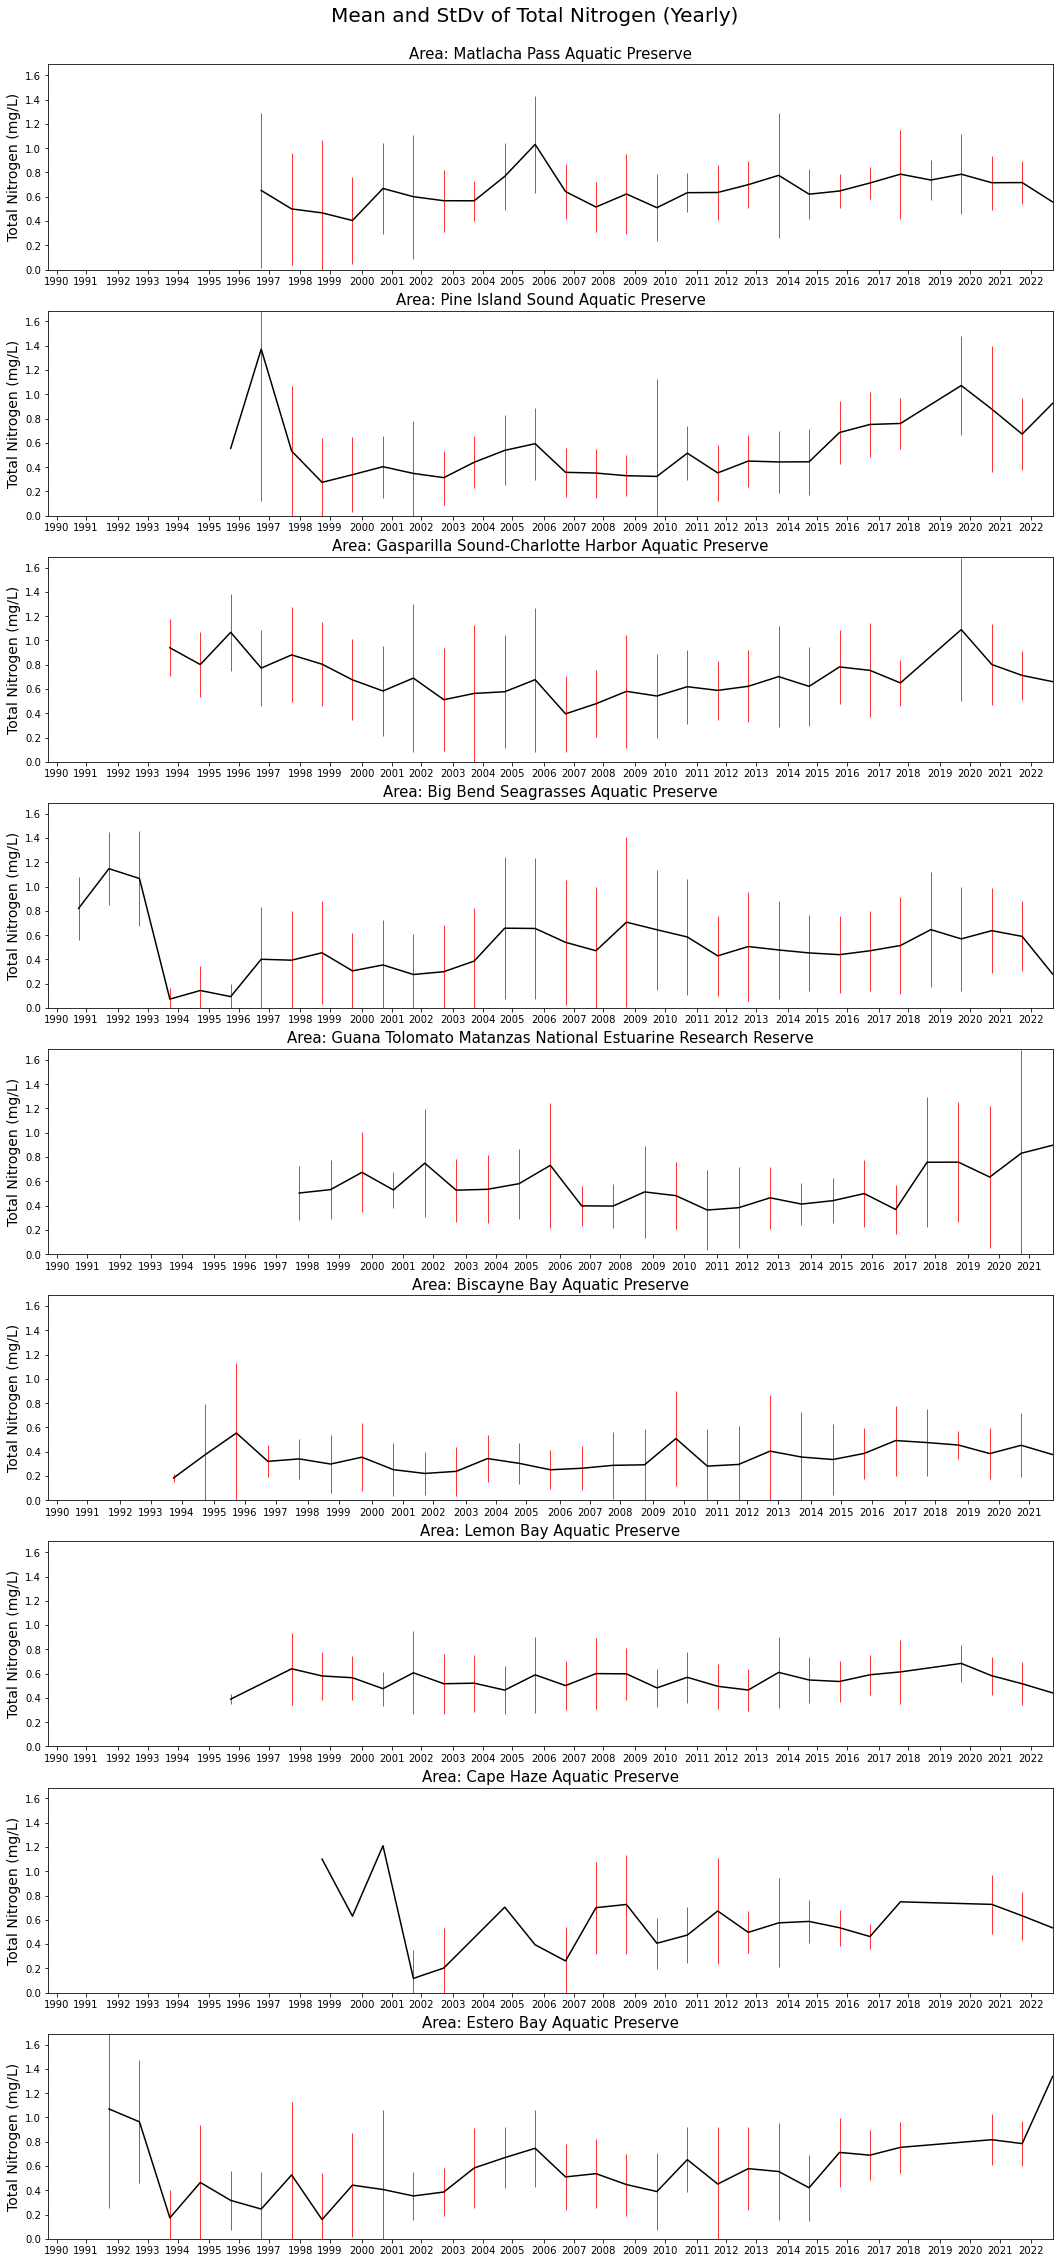

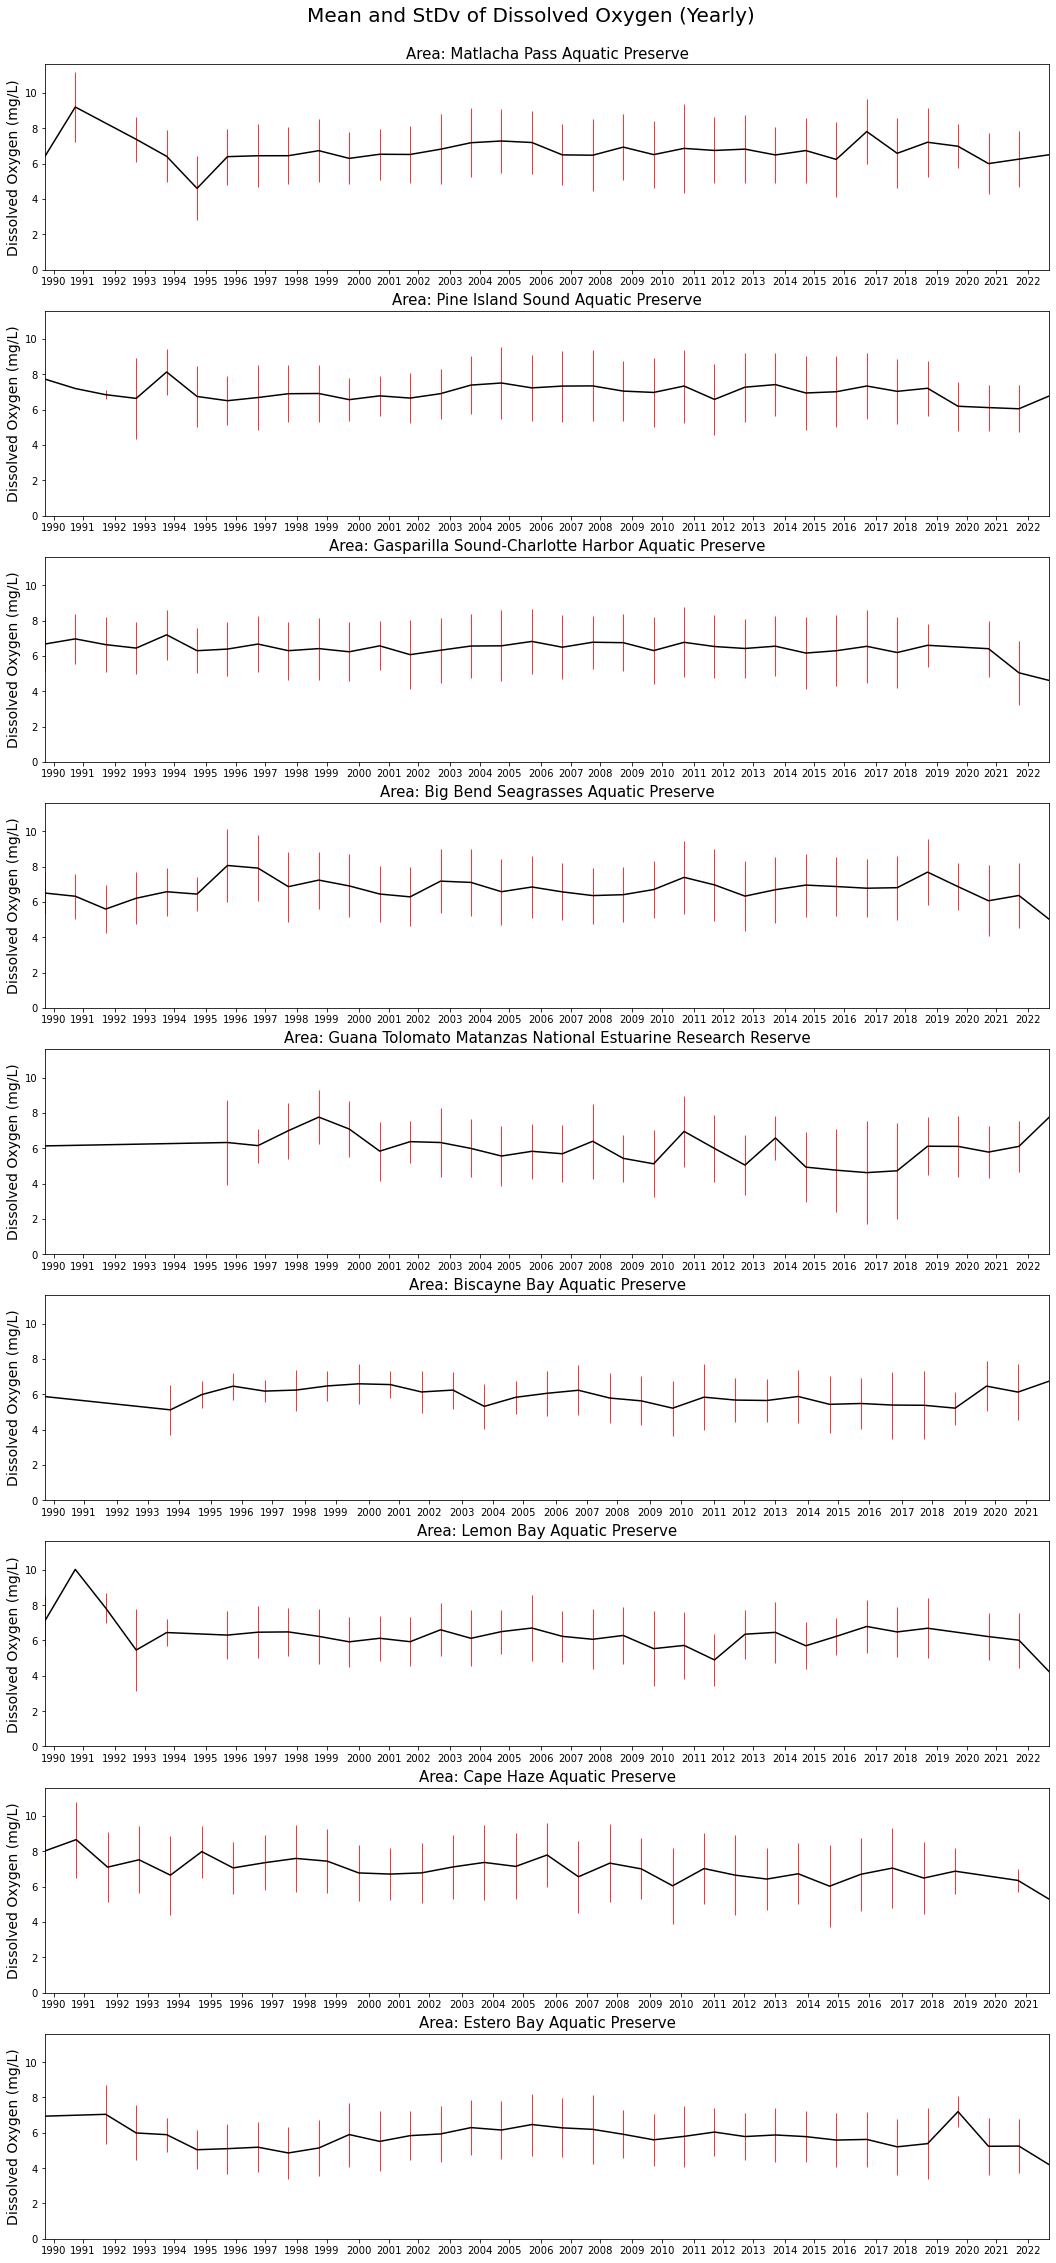

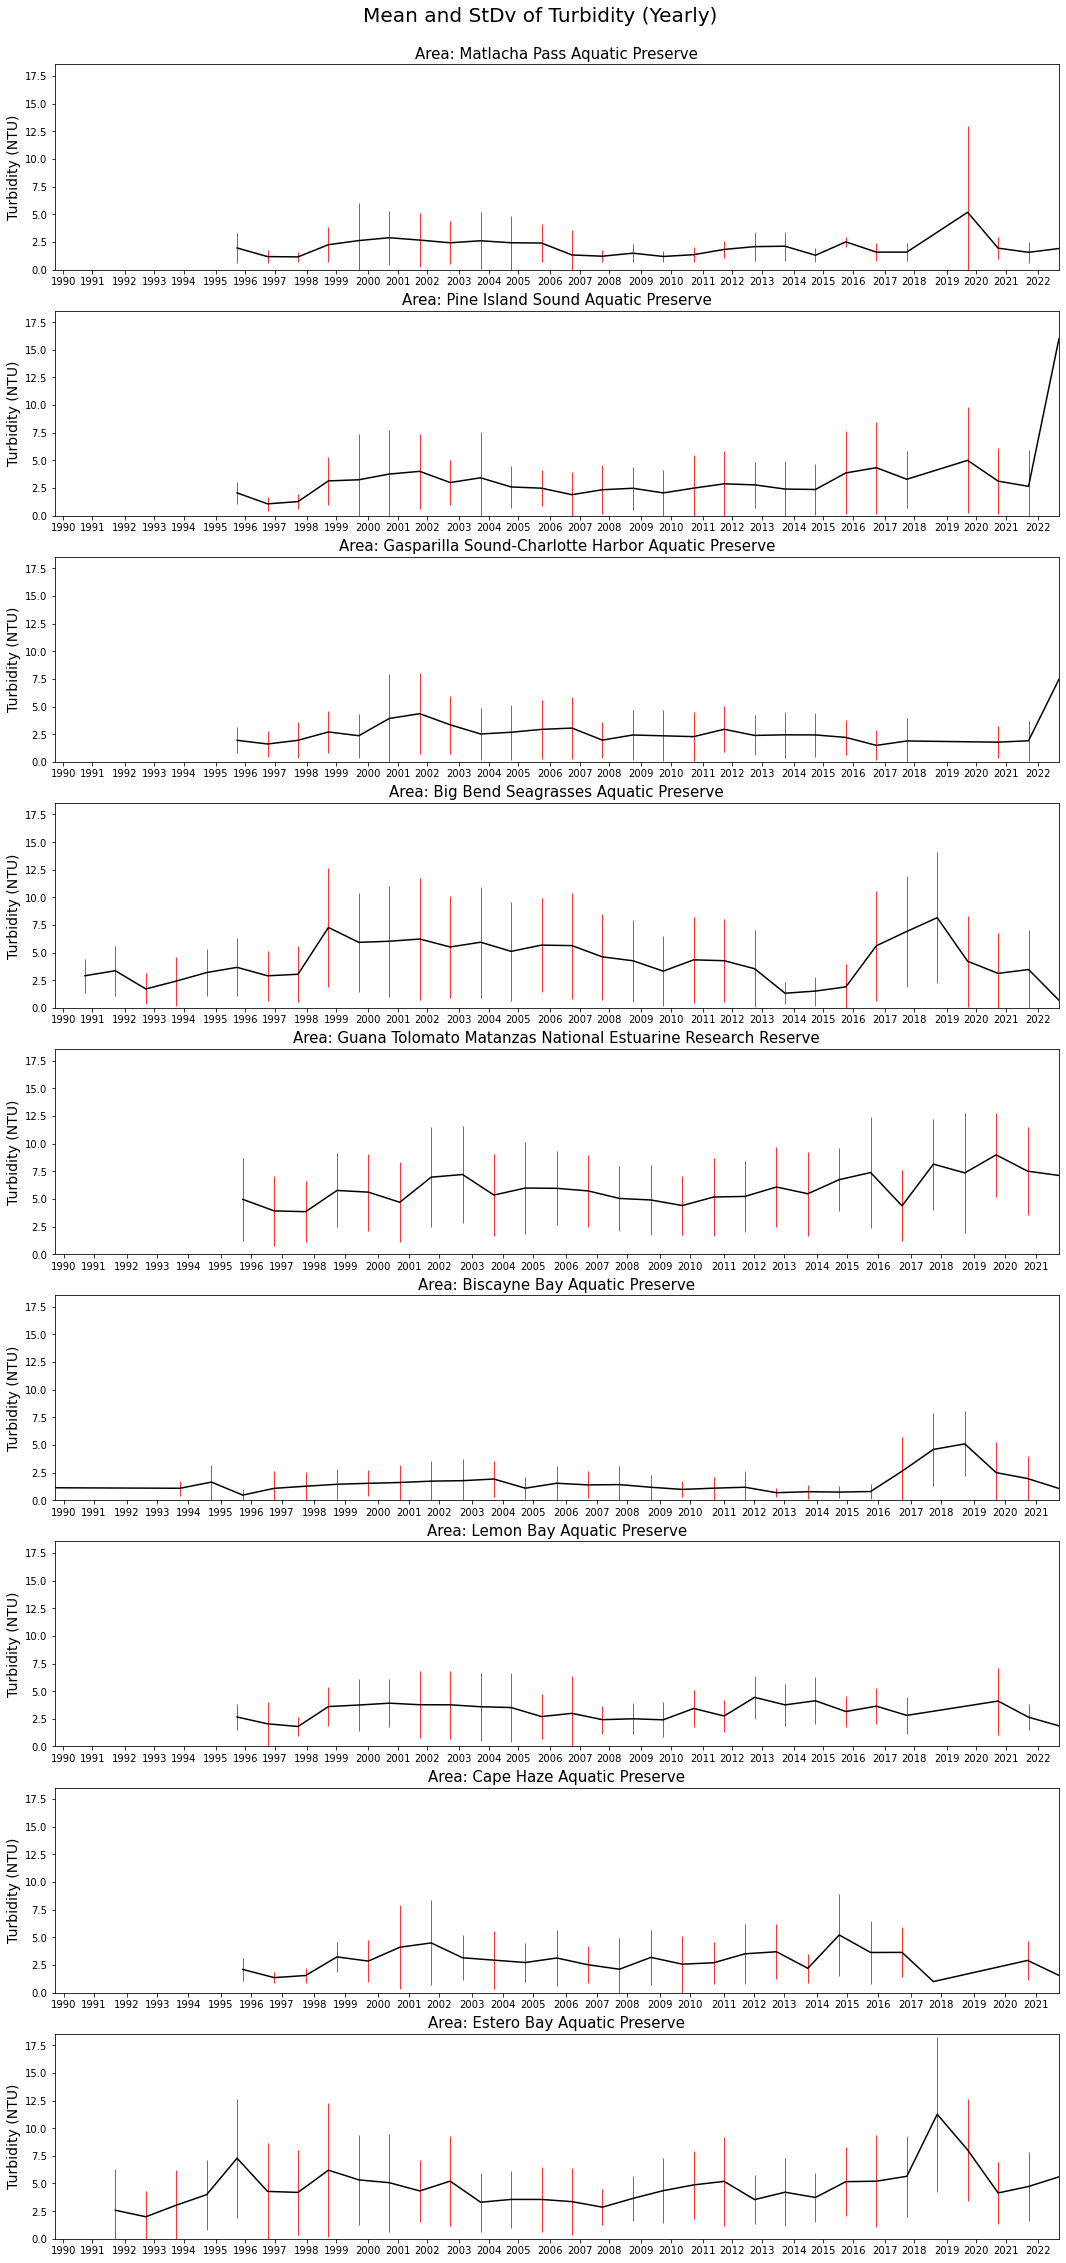

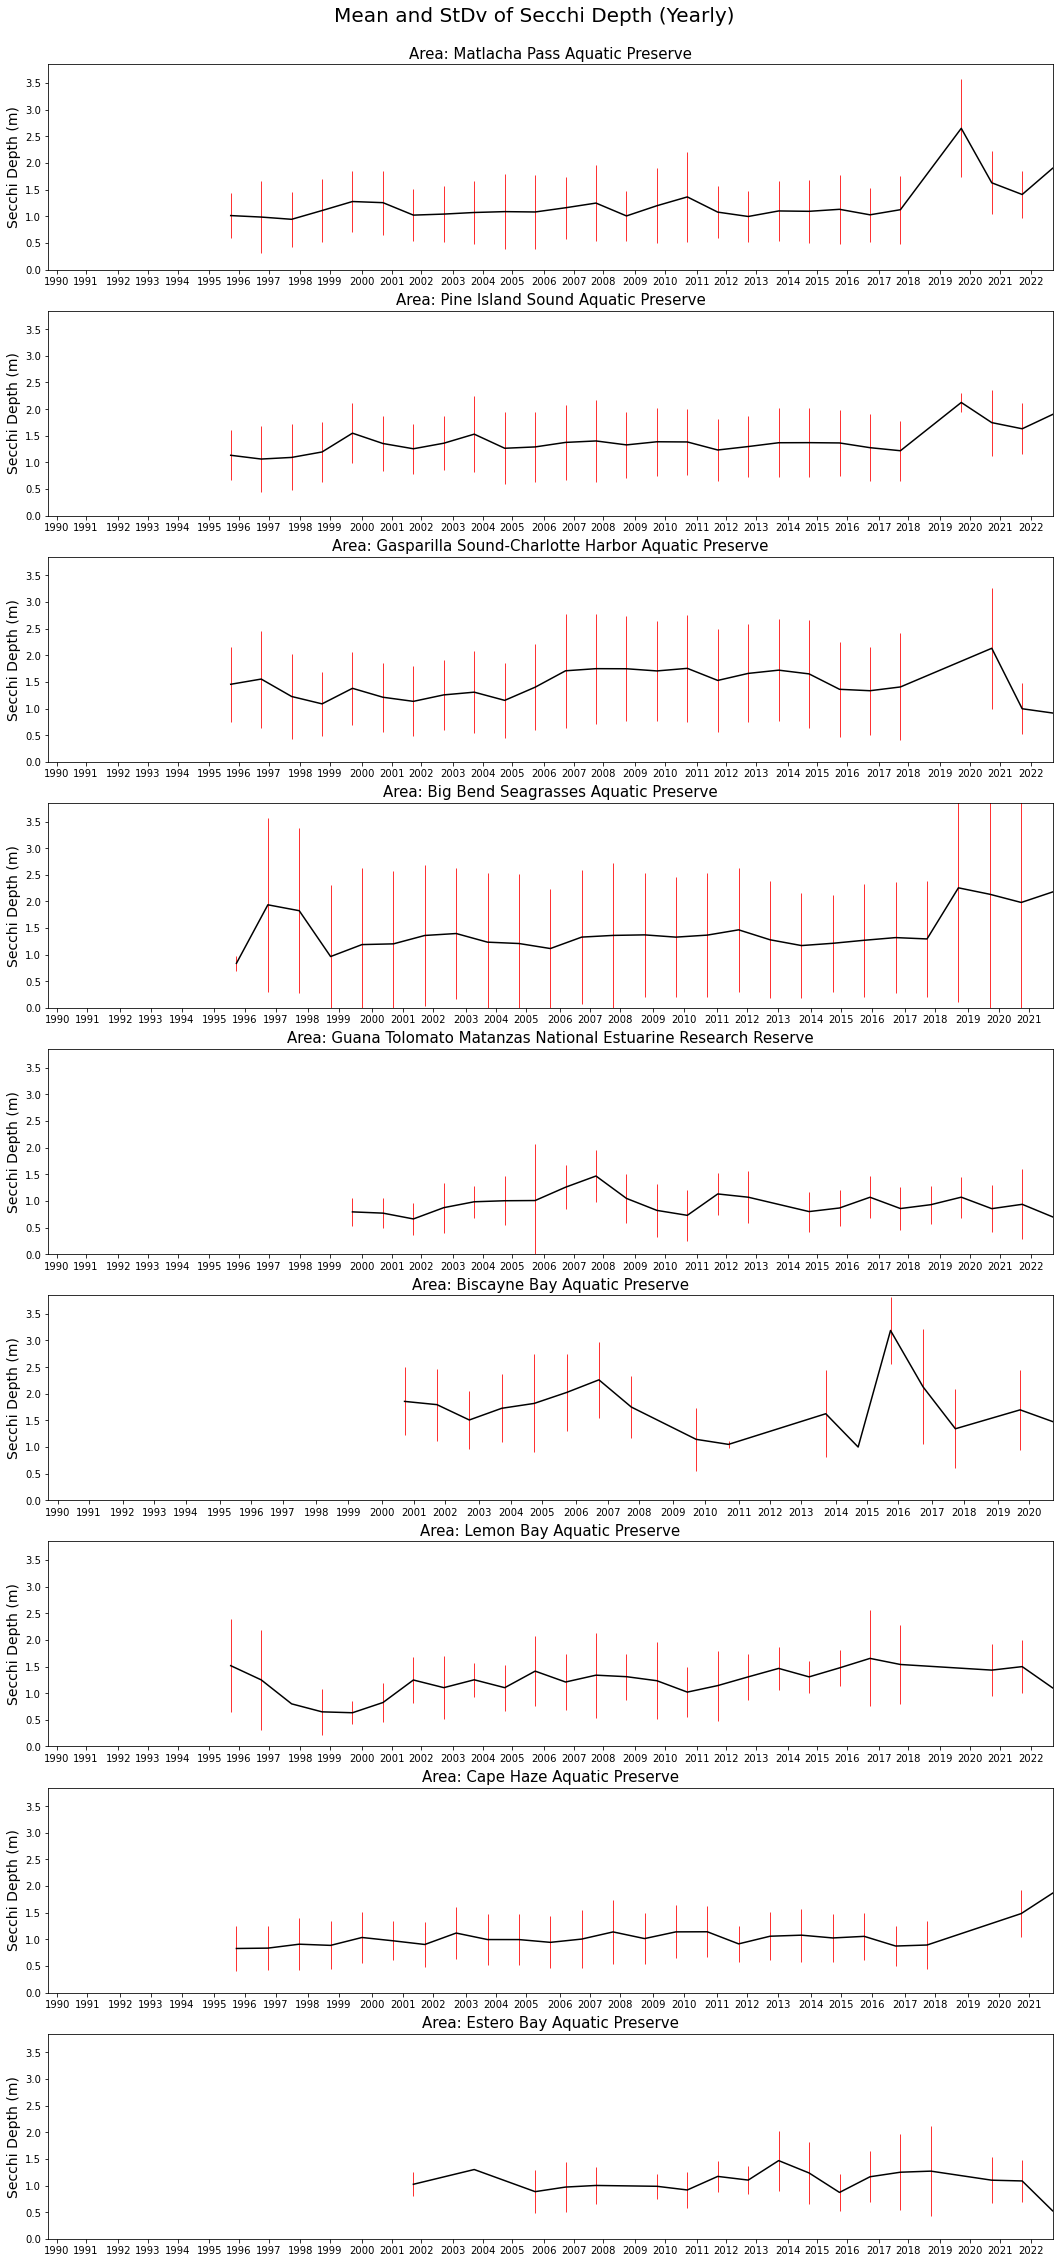

In [8]:
plt.rcParams['figure.figsize'] = [18, 40]
#for value in listValue:
value = listValue[1]

rule  = rrulewrapper(YEARLY, byeaster=1, interval=1)
loc   = RRuleLocator(rule)

r, c = len(listArea),1

for para in listPara:
    fig = plt.figure()
    # Create the main title
    plt.suptitle("Mean and StDv of {} (Yearly)".format(para), fontsize = 20, y = 0.90)
    # Calculate the upper limit of y axis
    stats = yearly_count[(yearly_count["ParameterName"] == para)]
    up_lim = stats['mean'].max()+stats['std'].mean()
    for i in range(len(listArea)):
        dfNew = yearly_count[(yearly_count["ParameterName"] == para) & (yearly_count["ManagedAreaName"]== listArea[i])]
        ax = fig.add_subplot(r,c,i+1)
        
        # Set title and font size
        ax.set_title('Area: '+ str(listArea[i]), size=15) # Title
        
        ax.errorbar(dfNew["timestamp"],dfNew['mean'],dfNew['std'],ecolor='red',elinewidth = 0.8,color="black")
        ax.xaxis.set_major_locator(loc)
        
        # Set limit of x and y axis
        ax.set_ylim([0,up_lim])
        ax.set_xlim([pd.Timestamp('1990-01-01'),dfNew["timestamp"].max()])
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None,hspace=0.2)
        plt.ylabel("{} ({})".format(para,dictUnits[para]), size = 14)

### 2.5 Statistics by Months

The following boxplots are statistics in the same months in different years. 

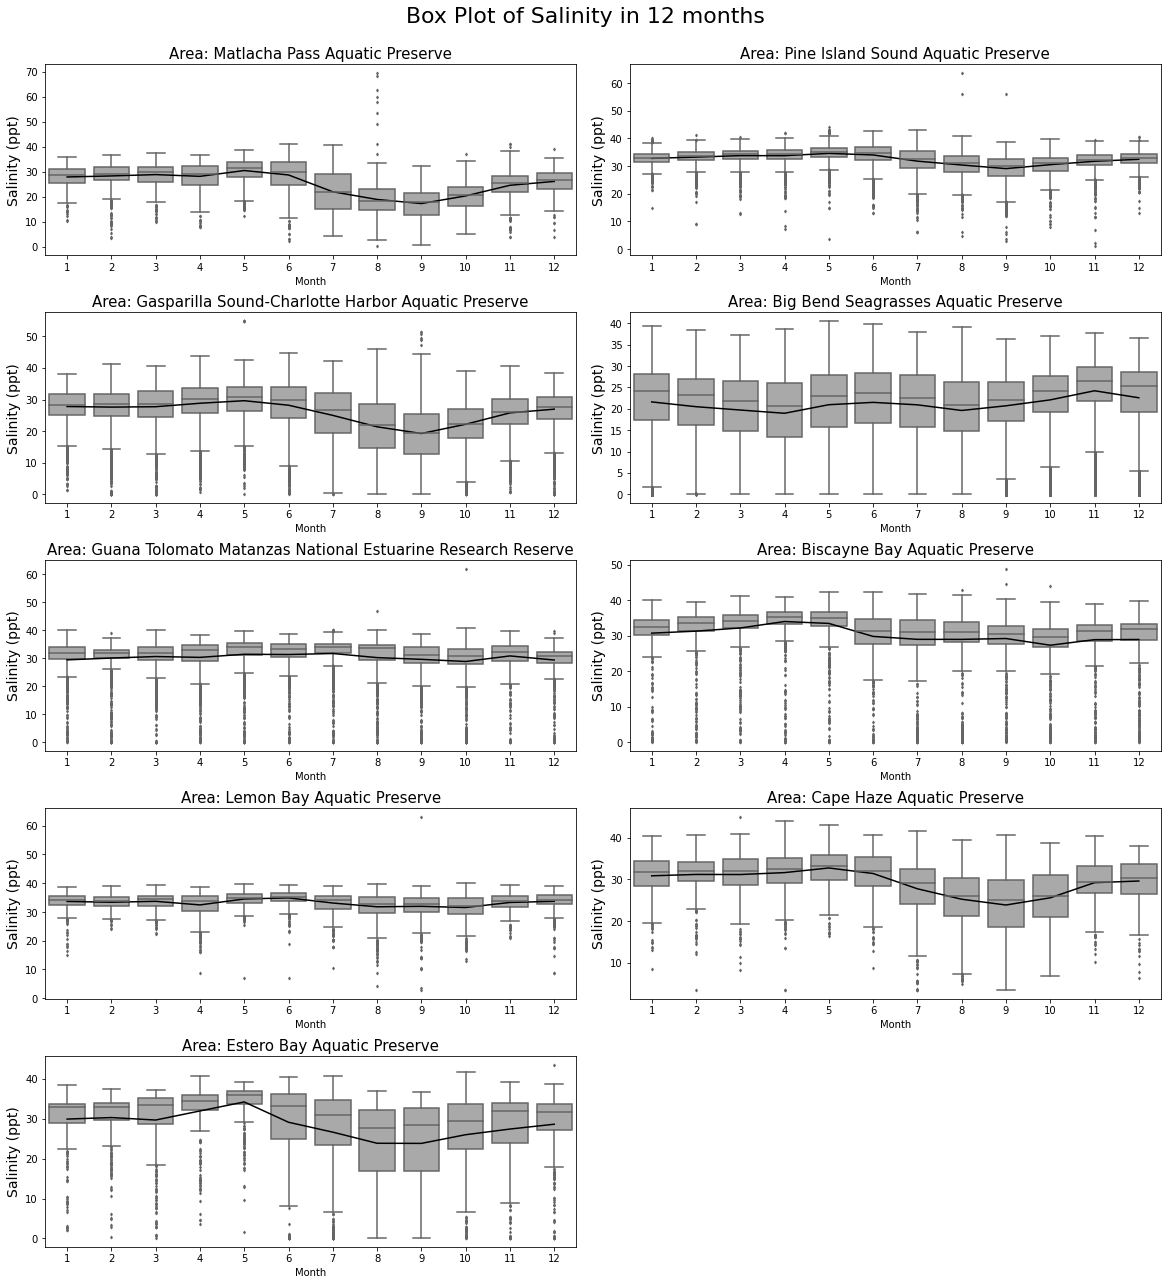

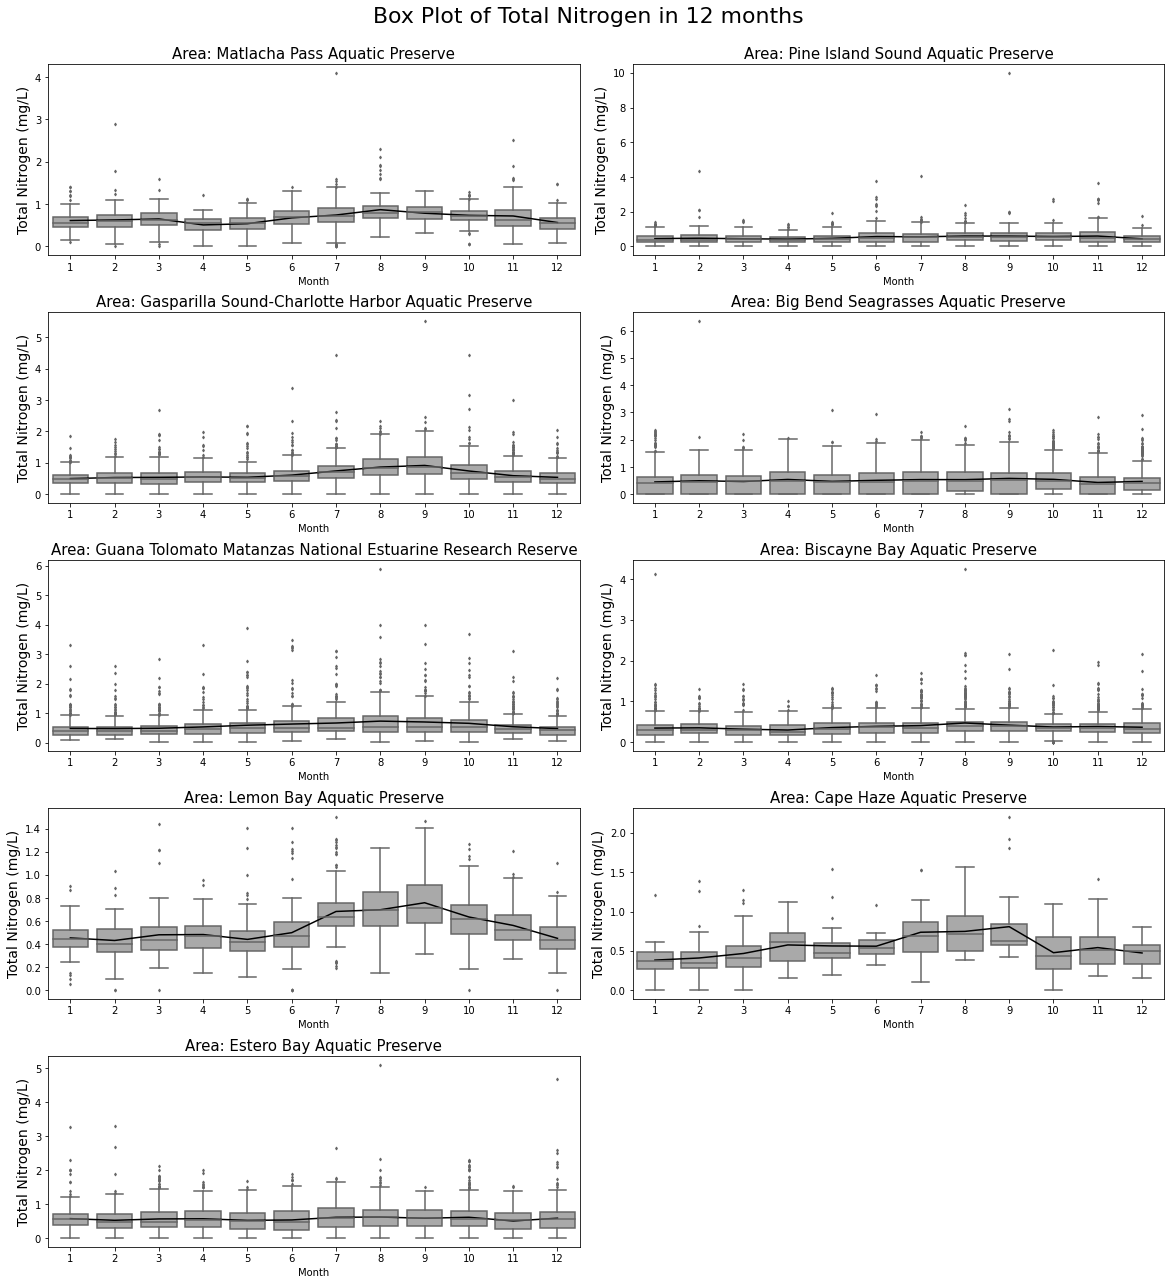

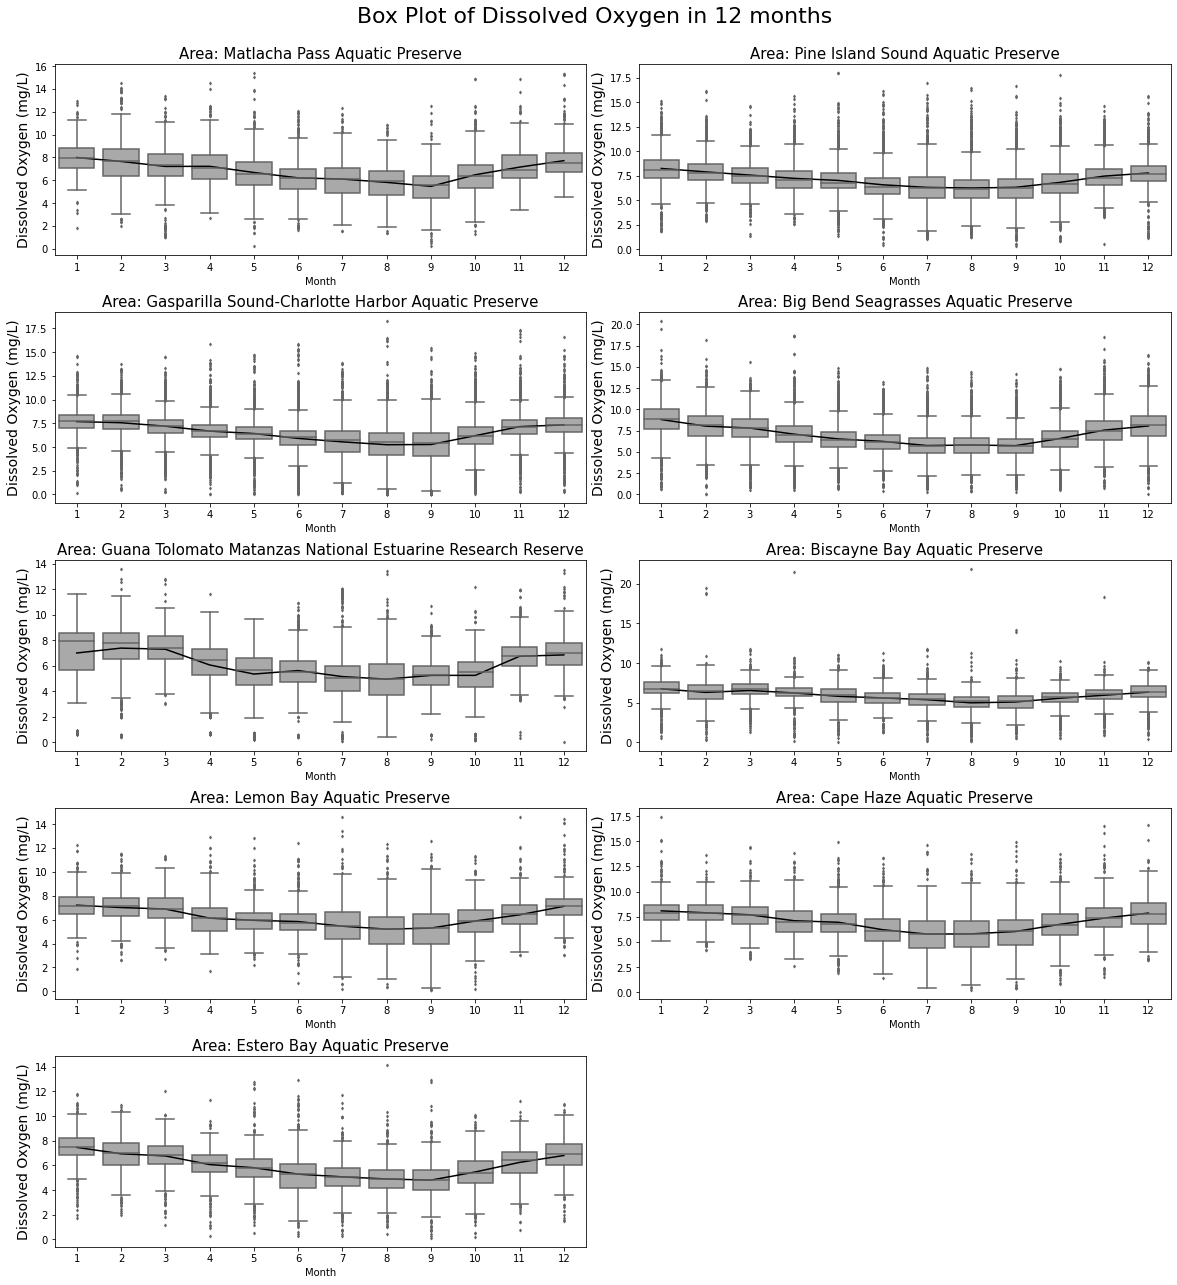

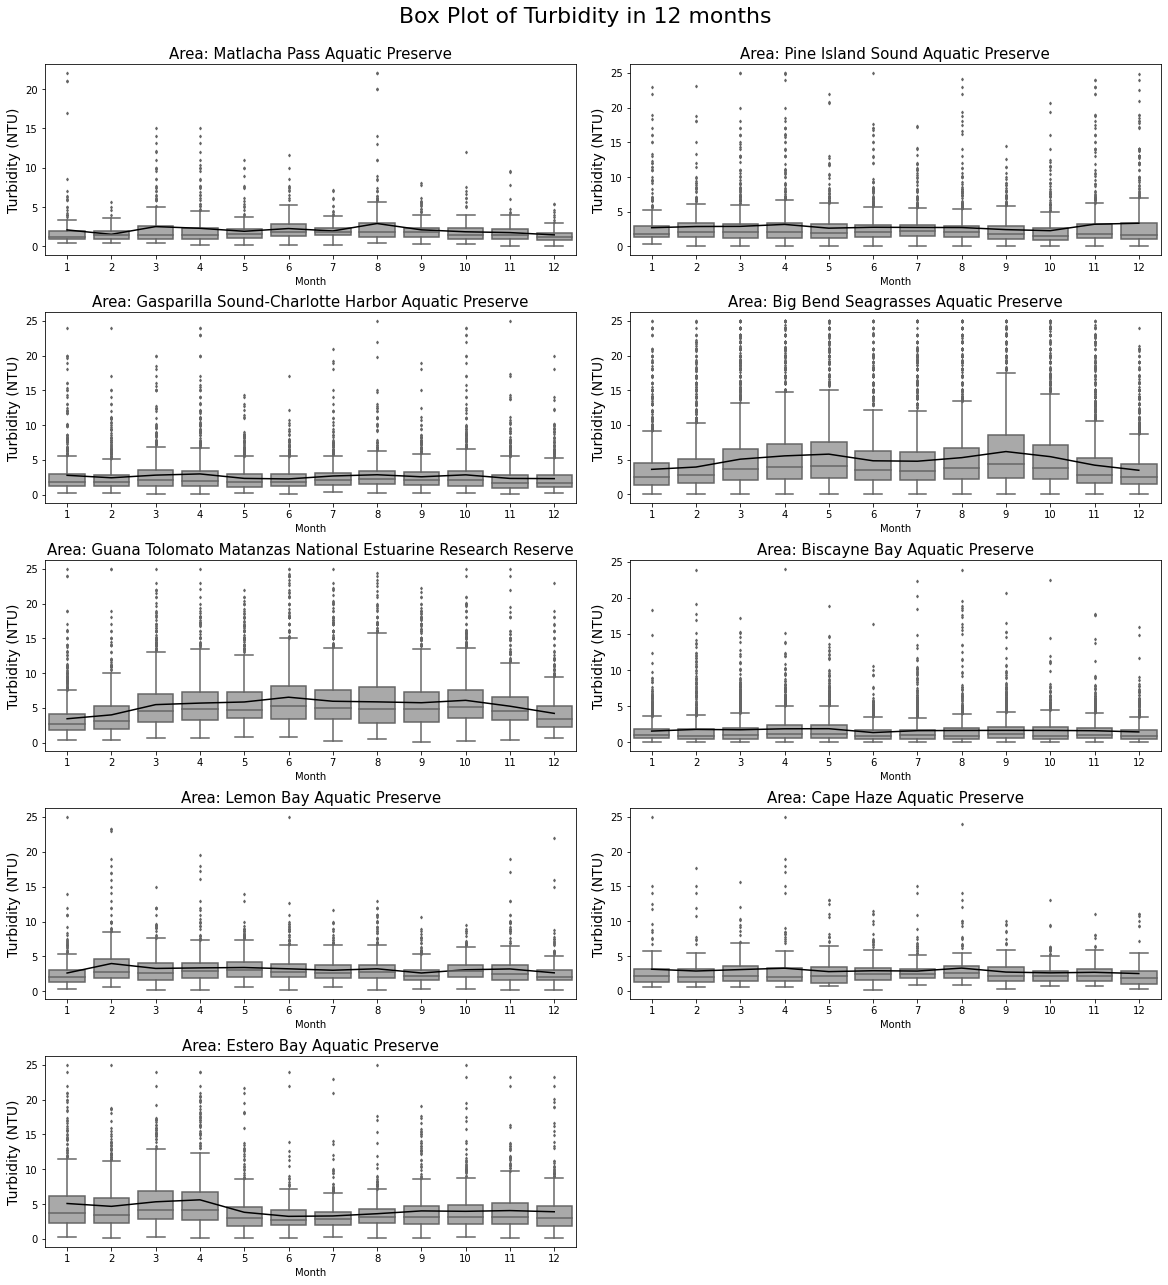

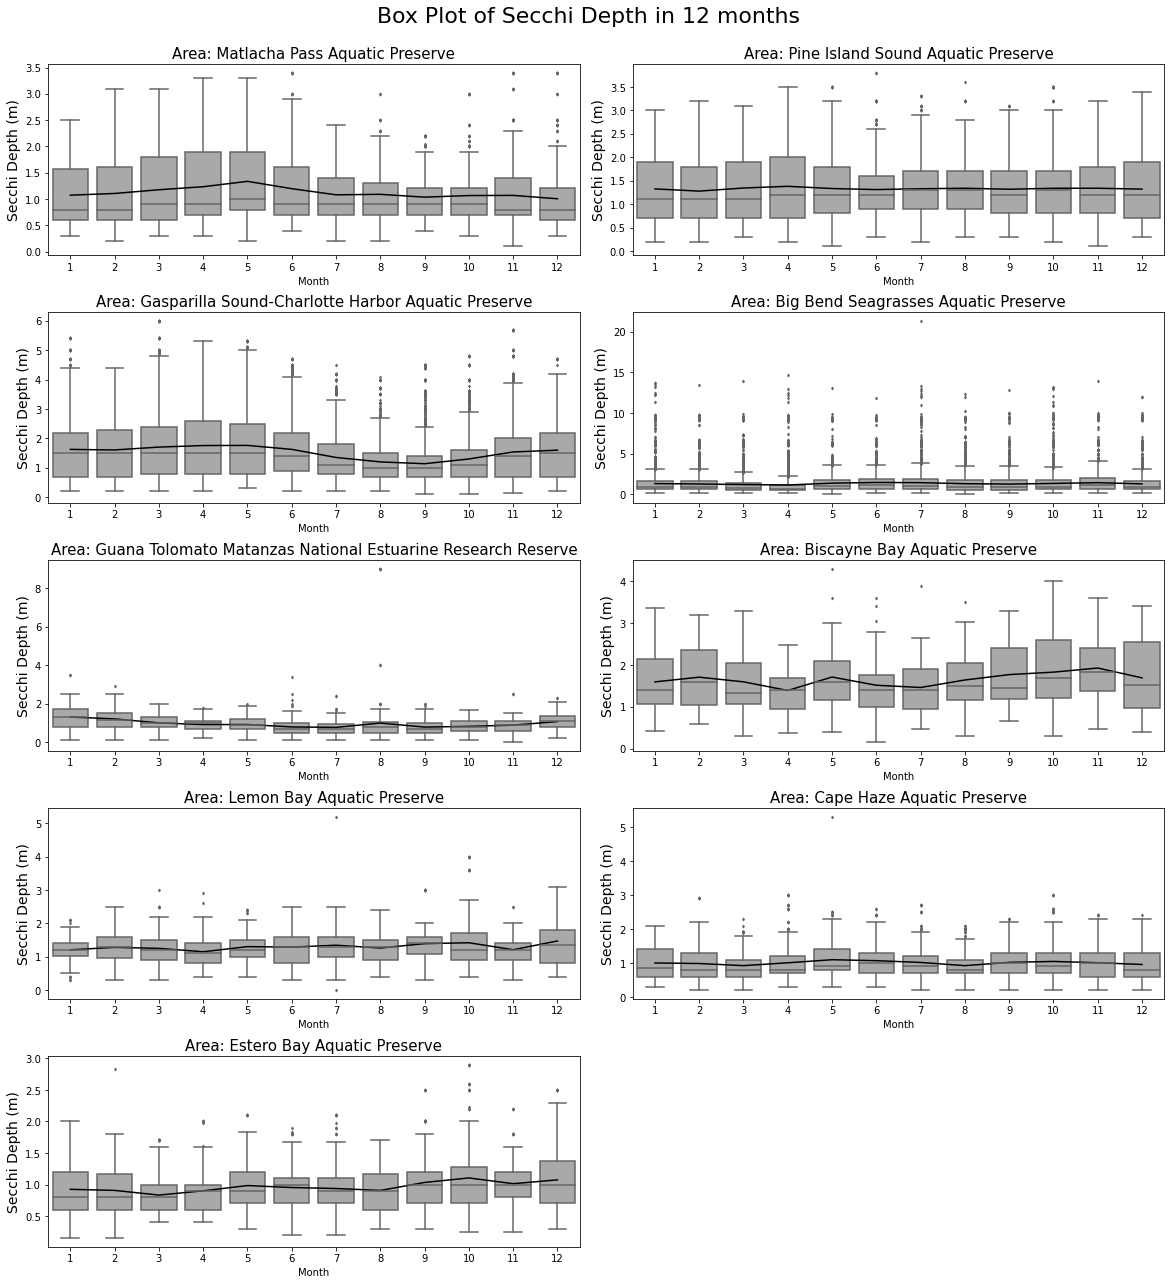

In [9]:
plt.rcParams['figure.figsize'] = [20, 40]

# Group the data by each month
df3 = df2.groupby(["Month","ManagedAreaName","ParameterName"])["ResultValue"].agg([
    "count","max","min","mean","std"]).reset_index()


for para in listPara:
    fig = plt.figure()
    plt.suptitle("Box Plot of {} in 12 months".format(para), fontsize = 22, y = 0.90)
    i=0
    for area in listArea:
        
        df4 = df2[(df2["ManagedAreaName"]==area)&(df2["ParameterName"]==para)]
        df3_slct = df3[(df3["ManagedAreaName"]==area)&(df3["ParameterName"]==para)]

        ax = fig.add_subplot(9,2,i+1)

        sns.boxplot(x=df4["Month"], y=df4["ResultValue"],orient='v',color='darkgray',fliersize=2, ax = ax)
        sns.lineplot(x=df3_slct["Month"]-1, y=df3_slct["mean"],color='black',ax=ax)
        ax.set_title("Area: {}".format(area), size=15) # Title
        
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)
        plt.ylabel("{} ({})".format(para,dictUnits[para]), size = 14)
        
        i = i + 1